# Roller Coasters Statistics Visualisation

The goal of this project is visualizing data covering international roller coaster rankings and statistics.

Roller coasters are often split into two main categories based on their construction material: wood or steel. Rankings for the best wood and steel roller coasters from the 2013 to 2018 Golden Ticket Awards are provided in `Golden_Ticket_Award_Winners_Wood.csv` and `Golden_Ticket_Award_Winners_Steel.csv`, respectively.

## Tasks

### 1. Roller Coasters Rankings

#### 1.1. Investigate

1.1.1.  Let's start by importing pandas and some other libraries, loading each CSV into a DataFrame and inspecting it to gain familiarity with the data.

In [1]:
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PowerTransformer


In [2]:
roller_coast_wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
roller_coast_steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')
roller_coast_list = pd.read_csv('roller_coasters.csv')


From documentation we got the following info about columns in the **"Golden Ticket Awards"** datasets: 

- `Rank:` rank of the roller coaster in a given year;
- `Name:` name of the roller coaster;
- `Park:` amusement park where the roller coaster is located;
- `Location:` location of the amusement park where the roller coaster is located;
- `Supplier:` manufacturer of the roller coaster;
- `Year Built:` year the roller coaster was built;
- `Points:` points scored in a given year’s ranking;
- `Year of Rank:` year the roller coaster achieved a given rank.

1.1.2. Let's check out wooden roller coasters.

In [3]:
roller_coast_wood

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1333,2013
1,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1302,2013
2,3,Phoenix,Knoebels Amusement Resort,"Elysburg, Pa.",Dinn/PTC-Schmeck,1985,1088,2013
3,4,The Voyage,Holiday World,"Santa Claus, Ind.",Gravity Group,2006,1086,2013
4,5,Thunderhead,Dollywood,"Pigeon Forge, Tenn.",GCII,2004,923,2013
...,...,...,...,...,...,...,...,...
175,46,Megafobia,Oakwood,"Pembrookshire, Wales",Custom Coasters,1996,84,2018
176,47,Hades 360,Mount Olympus,"Wisconsin Dells, Wis.",Gravity Group,2005,80,2018
177,48,Mine Blower,Fun Spot,"Kissimmee, Fla.",Gravity Group,2017,79,2018
178,49,Wooden Warrior,Quassy Amusement Park,"Meddlebury, Conn.",Gravity Group,2011,77,2018


1.1.3. Now the data types of the wooden roller coaster dataset.

In [4]:
roller_coast_wood.dtypes

Rank             int64
Name            object
Park            object
Location        object
Supplier        object
Year Built       int64
Points           int64
Year of Rank     int64
dtype: object

1.1.4. Check table statistics.

In [5]:
roller_coast_wood.describe()

,Rank,Year Built,Points,Year of Rank
count,180.000000,180.000000,180.000000,180.000000
mean,22.127778,1994.450000,392.388889,2016.500000
std,15.217246,24.309061,381.816130,1.388299
min,1.000000,1914.000000,66.000000,2013.000000
25%,8.000000,1994.000000,121.250000,2016.000000
50%,20.500000,2003.000000,213.500000,2017.000000
75%,35.250000,2009.000000,579.500000,2018.000000
max,50.000000,2017.000000,1625.000000,2018.000000


1.1.5. Same operations we should perform for steel roller coasters. 

In [6]:
roller_coast_steel

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013
1,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1011,2013
2,3,Expedition GeForce,Holiday Park,"Hassloch, Germany",Intamin,2001,598,2013
3,4,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,596,2013
4,5,Apollo's Chariot,Busch Gardens Williamsburg,"Williamsburg, Va.",B&M,1999,542,2013
...,...,...,...,...,...,...,...,...
175,46,Expedition Everest,Disney's Animal Kingdom,"Orlando, Fla.",Vekoma,2006,82,2018
176,47,Storm Chaser,Kentucky Kingdom,"Louisville, Ky.",Rocky Mountain,2016,81,2018
177,48,Raging Bull,Six Flags Great America,"Gurnee, Ill.",B&M,1999,78,2018
178,49,Thunderbird,Holiday World,"Santa Claus, Ind.",B&M,2015,72,2018


1.1.6. Let's check data types of the steel data set. 

In [7]:
roller_coast_steel.dtypes

Rank             int64
Name            object
Park            object
Location        object
Supplier        object
Year Built       int64
Points           int64
Year of Rank     int64
dtype: object

In [8]:
roller_coast_steel.describe()

,Rank,Year Built,Points,Year of Rank
count,180.000000,180.000000,180.000000,180.000000
mean,22.127778,2004.655556,325.433333,2016.500000
std,15.186377,9.511723,279.650322,1.388299
min,1.000000,1976.000000,59.000000,2013.000000
25%,8.000000,2000.000000,112.250000,2016.000000
50%,20.500000,2006.000000,246.000000,2017.000000
75%,35.250000,2012.000000,427.000000,2018.000000
max,50.000000,2018.000000,1354.000000,2018.000000


1.1.7. Now let's check for `NaN` values. 

In [9]:
print(roller_coast_wood.isnull().sum())
print(roller_coast_steel.isnull().sum())

Rank            0
Name            0
Park            0
Location        0
Supplier        1
Year Built      0
Points          0
Year of Rank    0
dtype: int64
Rank            0
Name            0
Park            0
Location        0
Supplier        0
Year Built      0
Points          0
Year of Rank    0
dtype: int64


1.1.8. "Supplier" column has one. 

In [10]:
roller_coast_wood[roller_coast_wood.Supplier.isnull()]

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
125,46,Grizzly (KD),Kings Dominion,"Doswell, Va.",NaN,1982,81,2017


Result: Most of the information is in place, at least at the first glance. Data types are also ok for our purposes.

1.1.9. As the next step, we are going to give answers to several questions:
- How many roller coasters are included in each ranking dataset? 
- How many different roller coaster suppliers are included in the rankings? 
- Do some years include more rankings than other years?

1.1.10. Let's start from the 1st one: how many roller coasters we have? We are going to include only unique rows from the datasets. 

In [11]:
len(roller_coast_wood.Name.unique())

61

In [12]:
len(roller_coast_steel.Name.unique())

63

- 61 of Wood
- 63 of Steel 

1.1.11. How many unique suppliers there are? 

In [13]:
len(roller_coast_wood.Supplier.unique())

33

In [14]:
len(roller_coast_steel.Supplier.unique())

15

- 33 for wooden equipment
- 15 for steel

1.1.12. Do some years include more rankings than others?

In [15]:
roller_coast_wood.groupby('Year of Rank').Rank.count().reset_index()

,Year of Rank,Rank
0,2013,10
1,2014,10
2,2015,10
3,2016,50
4,2017,50
5,2018,50


Basically yes,  from 2016 they started to rate 5 times more roller coasters per year, both wooden and steel. 

In [16]:
roller_coast_steel.groupby('Year of Rank').Rank.count().reset_index()

,Year of Rank,Rank
0,2013,10
1,2014,10
2,2015,10
3,2016,50
4,2017,50
5,2018,50


1.1.13. Let's check whether there are ranked roller coasters in Sweden.

In [17]:
def rl_bylocation(location, dataset):
    filtered = dataset[dataset['Location'].str.contains(location)]
    return filtered.groupby(['Name', 'Location']).size().reset_index(name= 'Count')

In [18]:
rl_bylocation('Sweden', roller_coast_steel)

,Name,Location,Count
0,Helix,"Gothenburg, Sweden",3
1,Jetline,"Stockholm, Sweden",1
2,Lisebergbanan,"Gothemburg, Sweden",1
3,Lisebergbanan,"Gothenburg, Sweden",2


1.1.14. There is a typo in the name "Gothenburg", let's fix it. 

In [19]:
roller_coast_steel.Location = roller_coast_steel.Location.replace('Gothemburg', 'Gothenburg', regex=True)

Checking the results.

In [20]:
rl_bylocation('Sweden', roller_coast_steel)

,Name,Location,Count
0,Helix,"Gothenburg, Sweden",3
1,Jetline,"Stockholm, Sweden",1
2,Lisebergbanan,"Gothenburg, Sweden",3


1.1.15. Now we check out wooden roller coasters.

In [21]:
rl_bylocation('Sweden', roller_coast_wood)

,Name,Location,Count
0,Balder,"Gothenburg, Sweden",4
1,Twister,"Stockholm, Sweden",2
2,Wildfire,"Norrköping, Sweden",3


There are 6 roller coasters across Sweden:
- 3 steel; 
- 3 wooden;
- 2 in the Stockholm area, where I live.

#### 1.2. Clean
1.2.1. Clean the datasets from issues that have been found during visualisation process below.

In [22]:
# Add a colon to all data points with such name
roller_coast_steel.Name = roller_coast_steel.Name.replace('Superman The Ride', 'Superman: The Ride', regex=True)
# Remove article from name "Voyage"
roller_coast_wood.Name = roller_coast_wood.Name.replace('The Voyage', 'Voyage', regex=True)

### 2.  Ranking Visualisation Functions

#### 2.1. Ranking of 1 

2.1.1. Let's write a function that will plot the ranking of a given roller coaster over time as a line. 

In [23]:
def visualise_r_coaster(dataset, roller_coast_name, location):
    # Prepare grid
    plt.figure(figsize = (16,9))
    sns.set(style='darkgrid',)

    # Filter dataset
    rcoaster_by_name_loc = dataset[(dataset.Name == roller_coast_name) & (dataset.Location == location)]
    # Draw lineplot
    axes = sns.lineplot(data = rcoaster_by_name_loc, x = 'Year of Rank', y = 'Rank', marker = "o")

    # Invert y values
    axes.invert_yaxis()
    
    # Add descriptions
    plt.xlabel('Years', fontsize=13)
    plt.ylabel('Rank', fontsize=13)
    plt.title('Roller Coaster\'s rank changes over years', fontsize=14)
    return plt.show()

2.1.2. Let's check it on **"El Toro"** in Jackson N.J.

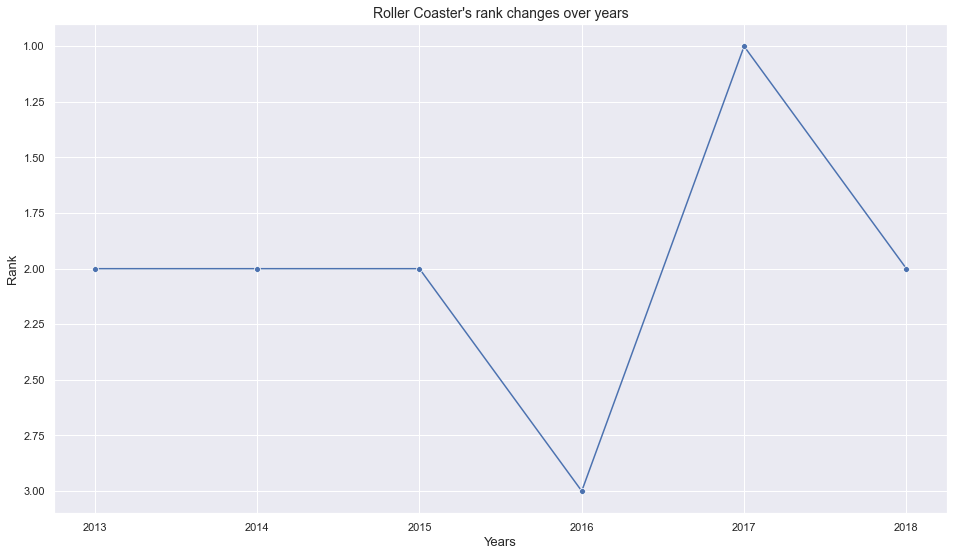

In [24]:
# Draw lineplot
visualise_r_coaster(roller_coast_wood, 'El Toro', 'Jackson, N.J.')

Considering that Rank has an inverted scale (1 is the best result), we have inverted our y values accordingly. 


#### 2.2. Ranking of 2 or more 

2.2.1. Now let's write a function that will plot the ranking of two given roller coasters over time as lines. We are going to take the most popular names of the roller coasters: **'El Toro'** and **'Boulder Dash'**.

In [25]:
names_list = ['El Toro', 'Boulder Dash'] 

2.2.2. Let's check what locations we have to specify them for the function. 

In [26]:
roller_coast_wood[roller_coast_wood.Name.isin(names_list)]

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1333,2013
1,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1302,2013
10,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1480,2014
11,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1291,2014
20,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1625,2015
21,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1464,2015
30,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",Custom Coasters,2000,1216,2016
32,3,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1121,2016
55,25,El Toro,Freitzeitpark Plohn,"Legendfeld, Germany",Great Coasters Int.,2009,166,2016
80,1,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2009,1241,2017


2.2.3. We can go with **'Jackson, N.J.'** and **'Bristol, Conn.'**

In [27]:
locations_list = ['Jackson, N.J.', 'Bristol, Conn.']

2.2.4. Now the function.

In [28]:
def visualise_r_coasters(dataset, names_list, locations_list):
    # Prepare grid
    plt.figure(figsize = (16,9))
    sns.set(style='darkgrid',)

    # Set up palette 
    colors = sns.color_palette("colorblind")
    customPalette = sns.set_palette(sns.color_palette(colors))

    # Filter dataset
    rcoaster_by_name_loc = dataset[(dataset.Name.isin(names_list)) & (dataset.Location.isin(locations_list))]
    # Draw lineplot
    axes = sns.lineplot(
        data = rcoaster_by_name_loc,
        x = 'Year of Rank',
        y = 'Rank',
        hue= 'Location', 
        style= 'Name', 
        palette = customPalette, 
        markers=True,
        markersize=10,
        dashes=False,
        linewidth=1,
        )
    
    # Invert y values
    axes.invert_yaxis()

    # Add descriptions
    plt.xlabel('Years', fontsize=13)
    plt.ylabel('Rank', fontsize=13)
    plt.title('Roller Coaster\'s rank changes over years', fontsize=14)
    return plt.show()


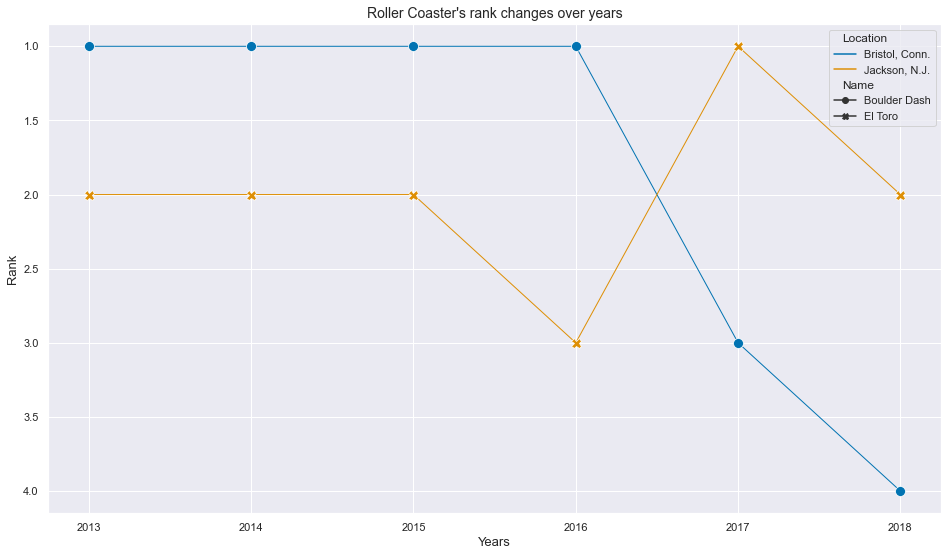

In [29]:
# Draw lineplot
visualise_r_coasters(roller_coast_wood, names_list, locations_list)

We can also add **"El Toro"** park in Germany to at least explore the possibility.

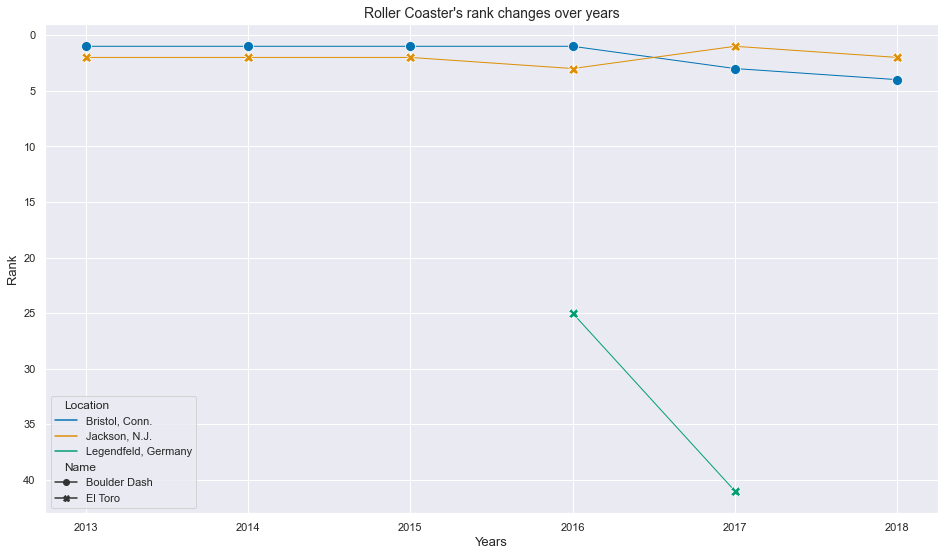

In [30]:
locations_list = ['Jackson, N.J.', 'Bristol, Conn.', 'Legendfeld, Germany']
visualise_r_coasters(roller_coast_wood, names_list, locations_list)

We have to admit that the last german coaster looks a bit out of place here without normalisation. Though normalisation is not a good variant if we want to see actual Ranks. Let's try to filter coasters with similar ranks to have a better understanding of the Rank fluctuations.

#### 2.3. Ranking of top `n`
Now we are going to write a function that will plot the ranking of the top `n` ranked roller coasters over time as lines. Due to the fact that several roller coasters can have the same Rank, but in different years we'll see more than exactly `n` coasters on the graph. 

2.3.1. So let's check how many roller coasters we should display on the graph, just in case. 

In [31]:
roller_coast_steel[roller_coast_steel.Rank <= 5]

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013
1,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1011,2013
2,3,Expedition GeForce,Holiday Park,"Hassloch, Germany",Intamin,2001,598,2013
3,4,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,596,2013
4,5,Apollo's Chariot,Busch Gardens Williamsburg,"Williamsburg, Va.",B&M,1999,542,2013
10,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1139,2014
11,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1049,2014
12,3,Expedition GeForce,Holiday Park,"Hassloch, Germany",Intamin,2001,764,2014
13,4,Diamondback,Kings Island,"Mason, Ohio",B&M,2009,579,2014
14,5,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,563,2014


There are many locations and roller coasters here, there is a chance that it will look messy on the graph, but let's give it a chance. 

2.3.2. Now we are going to write the function. 

In [32]:
def visualise_top_n(dataset, n):
    # Prepare grid
    plt.figure(figsize = (16,9))
    sns.set(style='darkgrid',)

    # Set up palette 
    colors = sns.color_palette("colorblind")
    customPalette = sns.set_palette(sns.color_palette(colors))

    # Filter dataset
    rcoaster_by_rank = dataset[dataset.Rank <= n]
    # Draw lineplot
    axes = sns.lineplot(
        data=rcoaster_by_rank,
        x='Year of Rank',
        y='Rank',
        hue='Location',
        style='Name',
        palette=(customPalette),
        markers=True,
        markersize=20,
        dashes=False,
        linewidth=1,
    )
    
    # Invert y values
    axes.invert_yaxis()
    # Add descriptions
    plt.xlabel('Years', fontsize='large')
    plt.ylabel('Rank', fontsize='large')
    plt.title('Roller Coaster\'s rank changes over years', fontsize='x-large')
    
    leg = plt.legend(
        loc='upper right', 
        bbox_to_anchor=(1.19, 1, 0.04, 0.01), 
        fontsize='large', 
        markerscale=2.5 
        )
    # Set up line width for legend
    for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)

    return plt.show()
    

We had to tweak many parameters to get markers and colours as distinctive as possible.

2.3.3. Let's visualise coasters with the Rank 5 and higher in different places. 

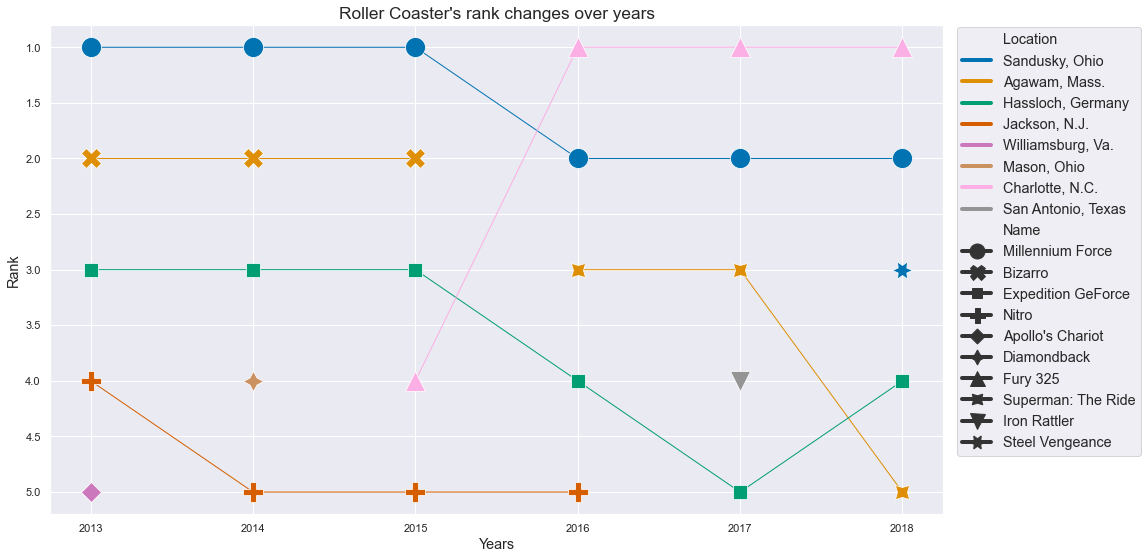

In [33]:
visualise_top_n(roller_coast_steel, 5)

 Note: We had found 2 **'Superman: The Ride'** with and without colon at the same location on our graph when called the function for the first time, to fix the issue without taking space we performed a fix at the first part of the project, check out item 1.15. 

#### Summary (steel roller coasters): 

- 9 out of 10 roller coasters with the best Ranks are located in the **US**. 
- The only exception is *`"Expedition GeForce"`* located in **Hassloch, Germany**, with a Ranks of around 3-5 over the period from 2013 to 2018.
- The best steel roller coaster over the period from 2016 to 2018 is *`"Fury 325"`* and it's located in **Charlotte, N.C**. It is also unique in its impressive Rank leap from the 4th in 2015 to the 1st in 2016.
- Fair share of success has *`"Millennium Force"`* in **Sandusky, Ohio**. It had been an absolute leader in 2013-2015 before it was shifted to Rank 2 in 2016-2018. 
- *`"Bizzaro"`*, located in **Agawam, Massachusetts**, with its firm Rank 2 in 2013-15 vanished from the leaderboard afterwards.
- *`"Superman: The Ride"`* also in **Agawam, Massachusetts**. had been having Rank 3 in 2016-2017 but was shifted to Rank 5 in the next year. 
- *`"Steel Vengeance"`* also located in **Sandusky, Ohio**, had managed to sparkle once on the 3d Rank in 2018 before data in this set ran out. 
- *`"Diamondback"`* and *`"Iron Rattler"`* in **Mason, Ohio** and **San Antonio, Texas**, respectively, appeared once on the Rank 4. 
- *`"Nitro"`* in *Jackson, N.J.*, had been having Ranks 4-5 during years 2013-2016, but then also vanished from the leader board. 
- *`"Apollo's Chariot"`* in **Williamsburg, Virginia**, got itself Rank 5 in 2013 and then had been shifted from the leaderboard below.

2.3.4. Let's check the wooden coasters. 

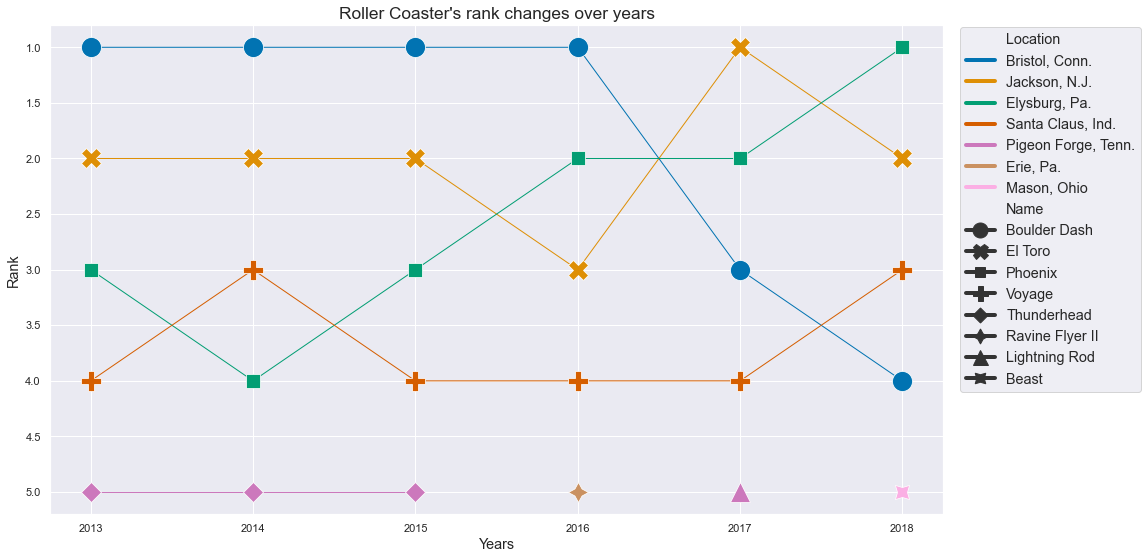

In [34]:
# Draw lineplot
visualise_top_n(roller_coast_wood, 5)

Note: we did the same type of correction for duplicates with and without "the" for the roller coaster with the name "Voyage" in item 1.15.

#### Summary (wooden roller coasters): 

- Wooden roller coasters with the highest Ranks are located exceptionally in the **US**, at least according to this dataset.
- *`"Boulder Dash"`* in **Bristol, Connecticut**, have been getting Rank 1 during years 2013-2016 but then had been lowered to the Rank 3 in the 2017th and to Rank 4th year after.
- Not so dramatic but also a bumpy path of success has *`"El Toro"`*, located in **Jackson, N.J.**: from Rank 1 in 2013-2015 through 4th and 1st and then back to the 2nd Rank in 2018. 
- *`"Phoenix"`* in **Elysburg, Pennsylvania**, had been getting success step by step from Rank 3 in 2013 to the 1st in 2018.
- *`"Voyage"`* in **Santa Claus, Indiana**, had been having Ranks 3-4 over years 2013-2018. 
- *`"Thunderhead"`* in **Pigeon Forge, Tennessee**, *`"Ravine Flyer II"`* in **Erie, Pennsylvania**, *`"Lightning Rod"`* also located in **Pigeon Forge** and *`"Beast"`* in **Mason, Ohio**, have been getting Rank 5 in different years from 2013 to 2018. 

### 3. Roller Coasters DataFrame Statistics 

Now that we’ve visualized rankings over time, let’s dive into the actual statistics of roller coasters themselves. "Captain Coaster" is a popular site for recording roller coaster information. Data on all roller coasters documented on "Captain Coaster" has been accessed through its API and stored in `roller_coasters.csv.` We have already loaded the data from the csv into a DataFrame at the beginning, so now we are going to inspect it to gain familiarity with the data.

According to given documentation the "Captain Coaster" dataset includes the following columns:

- `name:` name of the roller coaster
- `material_type:` the material used to build the roller coaster
- `seating_type:` the type of seating used on the roller coaster
- `speed:` maximum speed of the roller coaster, in kilometers/hour
- `height:` maximum height of the roller coaster, in meters
- `length:` length of the roller coaster, in meters
- `num_inversions:` total number of inversions on the roller coaster
- `manufacturer:` manufacturer of the roller coaster
- `park:` amusement park where the roller coaster is located
- `status:` operating status of the roller coaster

#### 3.1. Inspect
3.1.1. Let's check out the DataFrame.

In [35]:
roller_coast_list

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating
...,...,...,...,...,...,...,...,...,...,...
2797,Dragon Challenge,Steel,Sit Down,NaN,NaN,NaN,0.0,Pinfari,Barry Island Pleasure Park,status.operating
2798,Wild Mouse,Steel,Spinning,NaN,NaN,NaN,0.0,Reverchon,Barry Island Pleasure Park,status.operating
2799,Unnamed Atlantica Supersplash Clone,Steel,Sit Down,80.0,30.0,390.0,0.0,Mack,Le Pal,status.announced
2800,Unknown Duelling Launch Coaster,Steel,na,NaN,NaN,NaN,0.0,na,Universal's Epic Universe,status.rumored


3.1.2. Now let's look through its stats.

In [36]:
roller_coast_list.describe()

,speed,height,length,num_inversions
count,1478.000000,1667.000000,1675.000000,2405.000000
mean,70.102842,26.725855,606.147463,0.809563
std,28.338394,35.010166,393.840496,1.652254
min,0.000000,0.000000,-1.000000,0.000000
25%,47.000000,13.000000,335.000000,0.000000
50%,72.000000,23.000000,500.000000,0.000000
75%,88.000000,35.000000,839.000000,1.000000
max,240.000000,902.000000,2920.000000,14.000000


#### 3.2. Clean
3.2.1. We have some strange `na` values and -1 in "Length" column, let's replace it with `NaN`.

In [37]:
roller_coast_list = roller_coast_list.replace('\\bna\\b', np.NaN, regex=True)
roller_coast_list = roller_coast_list.replace(-1, np.NaN)
roller_coast_list


,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating
...,...,...,...,...,...,...,...,...,...,...
2797,Dragon Challenge,Steel,Sit Down,NaN,NaN,NaN,0.0,Pinfari,Barry Island Pleasure Park,status.operating
2798,Wild Mouse,Steel,Spinning,NaN,NaN,NaN,0.0,Reverchon,Barry Island Pleasure Park,status.operating
2799,Unnamed Atlantica Supersplash Clone,Steel,Sit Down,80.0,30.0,390.0,0.0,Mack,Le Pal,status.announced
2800,Unknown Duelling Launch Coaster,Steel,NaN,NaN,NaN,NaN,0.0,NaN,Universal's Epic Universe,status.rumored


3.2.2. Seems like there are a lot of absent numbers in this dataset, let's see how many. 

In [38]:
roller_coast_list.isnull().sum()

name                 3
material_type      533
seating_type        40
speed             1324
height            1135
length            1128
num_inversions     397
manufacturer       307
park                 0
status               0
dtype: int64

In columns "Length", "Height" and "Speed" more than a 3rd part of the data is absent and we have no means to fill them with something right now.


#### 3.3. Exploratory Histograms

As a quick exploratory visualisation let's write a function that plots a histogram of any numeric column of the roller coaster DataFrame. We are going to check several parameters with it: "Length", "Heigth" and "Speed". To make data less skewed we'll apply a logarithmic scale and remove outliers. 

3.3.1. Let's write a function that produces a histogram. 

In [39]:
def plot_histogram(dataset, column_name, name_capitalized, color):
    # Filter 0 and too small values
    dataset = dataset[dataset[column_name] > 0]

    # Prepare grid
    plt.figure(figsize = (16,9))
    sns.set(style='darkgrid',)

    # Draw histogram
    sns.histplot(dataset[column_name], log_scale=True, color=color)

    # Add descriptions
    plt.title(name_capitalized + ' Distribution', fontsize='x-large')
    plt.xlabel(name_capitalized, fontsize='large')
    plt.ylabel('Number of Roller Coasters', fontsize='large')

    m = np.max(dataset[column_name])
    ticks = [4 ** (x + 2) for x in range(int(np.log(m) / np.log(4)))]
    plt.xticks(ticks, [str(x) for x in ticks])

    return plt.show()

3.3.2. Let's call it on columns "Length", "Speed" and "Height".  

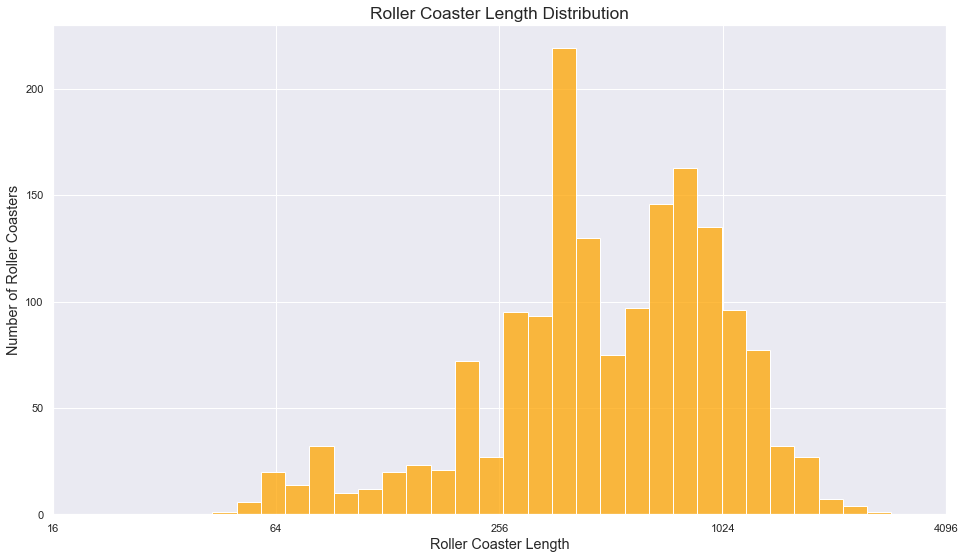

In [40]:
# Remove outliers
lengths = roller_coast_list[roller_coast_list['length'] > 30]

# Draw histplot of lenght
plot_histogram(lengths, 'length', 'Roller Coaster Length', 'orange')

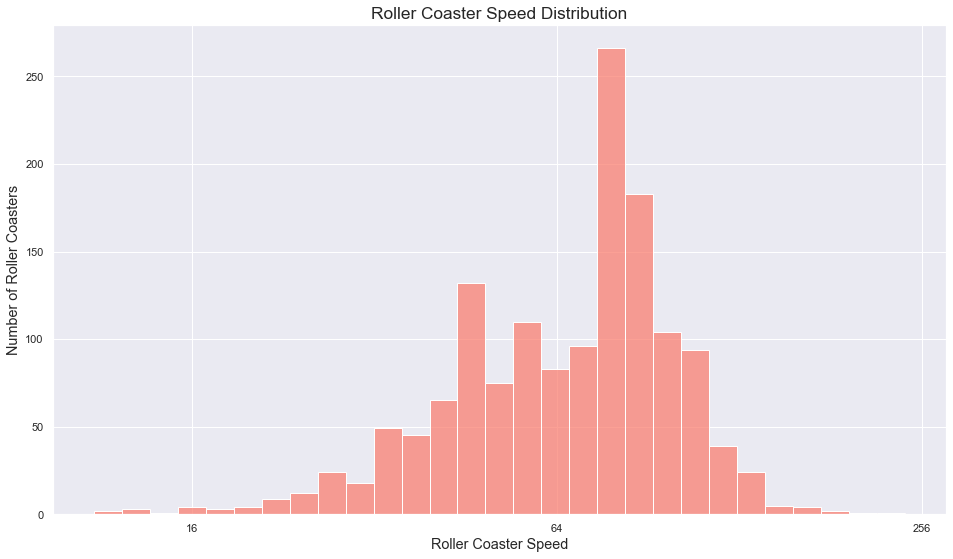

In [41]:
# Remove outliers
speeds = roller_coast_list[roller_coast_list['speed'] > 10]

# Draw histplot of speed
plot_histogram(speeds, 'speed', 'Roller Coaster Speed', 'salmon')

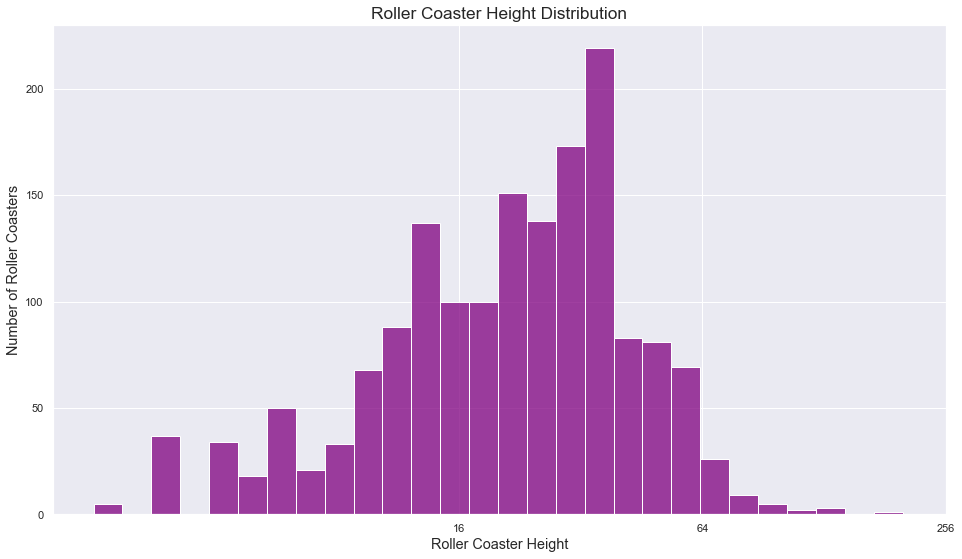

In [42]:
# Remove outliers
heights = roller_coast_list[roller_coast_list['height'] <= 300]

# Draw histplot of height
plot_histogram(heights, 'height', 'Roller Coaster Height', 'purple')

#### Summary:

Even after applying logariphmic scale all hisograms remained a bit skewed, but we can make some conclusions: 
- Each graph has the main and additional peaks: 
    - "Lenght" has the first around 450 and the second around 1100 meters;
    - "Speed" has the first around 40 and the second around 80 in kilometers per hour;
    - "Height" has the first around 16 and the second around 50 meters.

#### 3.4. Explore Inversions

3.4.1. Now let's write a function that creates a bar chart showing the number of inversions for each roller coaster at a given amusement park.

In [43]:
def visualise_barchart(dataset, park_name):
    # Prepare grid
    plt.figure(figsize = (18,9))
    sns.set(style='darkgrid',)

    # Filter 0 coasters with no inversions
    park_coasters = dataset[(dataset['park'] == park_name) & (dataset['num_inversions'] > 0)].reset_index()

    # Draw barplot
    sns.barplot(data = park_coasters, x = park_coasters['name'], y = park_coasters['num_inversions'])

    # Add descriptions
    plt.title(park_name + '\'s Roller Coasters with Inversions', fontsize='x-large')
    plt.xlabel('Roller Coasters\' Names', fontsize='large')
    plt.ylabel('Number of Inversions', fontsize='large')
    
    return plt.show()

3.4.2. Let's find a park with roller coasters that have many inversions. 

In [44]:
def find_park(dataset, n):
   a = dataset[dataset['num_inversions'] > 0].groupby('park').size().reset_index(name = 'with_inv')
   return a[a['with_inv'] > n]  
find_park(roller_coast_list, 4)

,park,with_inv
28,Busch Gardens Tampa,6
29,Busch Gardens Williamsburg,6
31,California's Great America,8
32,Canada's Wonderland,6
34,Carowinds,7
36,Cedar Point,8
63,Energylandia,5
77,Flamingo Land Theme Park and Zoo,7
79,Foire,12
121,Hersheypark,5


3.4.3. Some parks have impressive number of such coasters, we are going to check **"Foire"** park. 

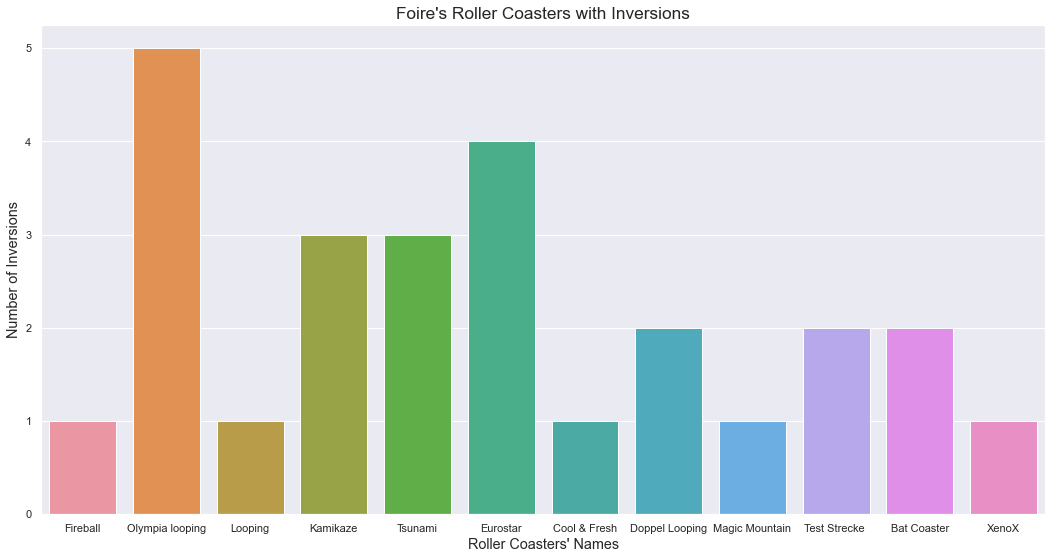

In [45]:
visualise_barchart(roller_coast_list, 'Foire')

3.4.4. That's a lot of coasters for one park, let's check how many **"Foire"** parks there are.

In [46]:
len(roller_coast_list[roller_coast_list['park'] == 'Foire'])

121

#### Summary:
- One of the parks' names that have many coasters with inversions is **"Foire"**. It's not one park though, but `121` in different locations.
- There are `12` roller coasters with inversions that belong to **"Foire"** parks. 
- The leaders by the number of inversions in **"Foire"** parks are  **"Olimpia looping"** (`5 inv.`) and **"Eurostar"** (`4 inv.`) coasters.

#### 3.5. Statuses Proportions

Now let's write a function that creates a pie chart that compares the percentages of the few main statuses between each other and to the whole. 

3.5.1. First we need to check how many coasters in each status. 

In [47]:
status = roller_coast_list['status'].value_counts()
status

status.operating             2172
status.closed.definitely      439
status.announced               42
status.construction            41
status.unknown                 34
status.closed.temporarily      25
status.relocated               22
status.retracked               16
status.rumored                 11
Name: status, dtype: int64

3.5.2. Now we need to create a list of labels for a pie chart. Let's check current statuses. 

In [48]:
roller_coast_list.status.unique()

array(['status.operating', 'status.relocated', 'status.closed.definitely',
       'status.retracked', 'status.closed.temporarily', 'status.unknown',
       'status.construction', 'status.announced', 'status.rumored'],
      dtype=object)

3.5.3. Considering that after status "Construction" number of coasters in each status is fairly low compared to the first 2 statuses, we are going to replace all statuses after "Construction" with "Other" and sum all their values to one value. 

In [49]:
status_labels = ['Operating', 'Permanently Closed', 'Announced', 'Under Construction', 'Other']

3.5.4. Let's write a pie function.

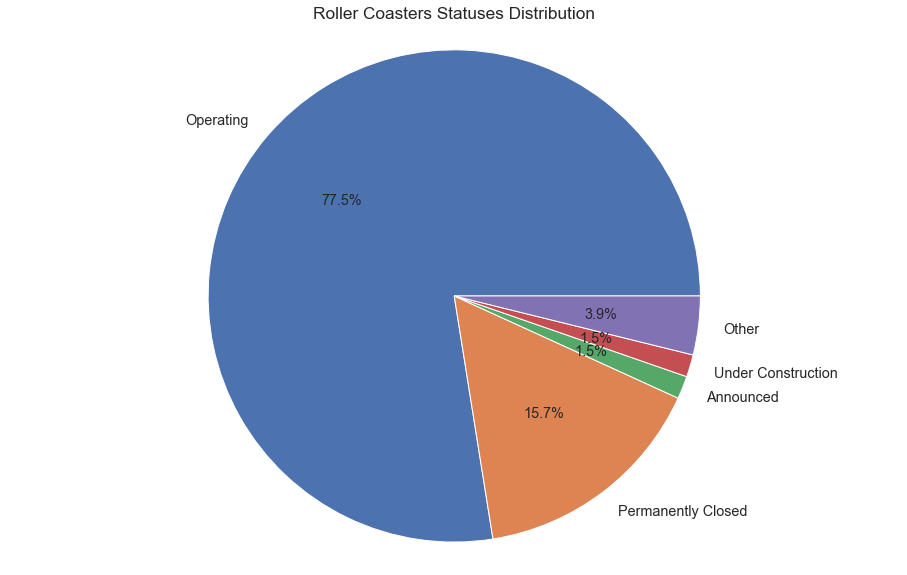

In [50]:
def visualise_pie(dataset, labels):
    # Prepare figure
    plt.figure(figsize = (16,10))

    # Sum small values under status "Other"
    other_value = dataset.values[4:].sum()
    statuses = dataset.values[0:4]
    statuses = np.append(statuses, other_value, axis=None)
    
    # Draw pie chart
    plt.pie(statuses, labels=labels, autopct='%0.1f%%', textprops={'fontsize': 'large'})
    plt.axis('equal')

    # Add title
    plt.title('Roller Coasters Statuses Distribution', fontsize='x-large')
    return plt.show()

# Draw piechart
visualise_pie(status, status_labels)

#### Summary: 
- Most of roller coasters are operating - 77.5%
- Quite a lot are already permanently closed - 15.7 %.
- Other statuses have less significant percentage values to the whole: 1.5 % are under constraction and the same amount are just announced, 3.9% have other statuses. 

#### 3.6. Data Relationships between Materials and Other Physical Params
3.6.1. Now let's write a function that creates a scatter plots that show data relationships beteween different columns of the roller coaster DataFrame.

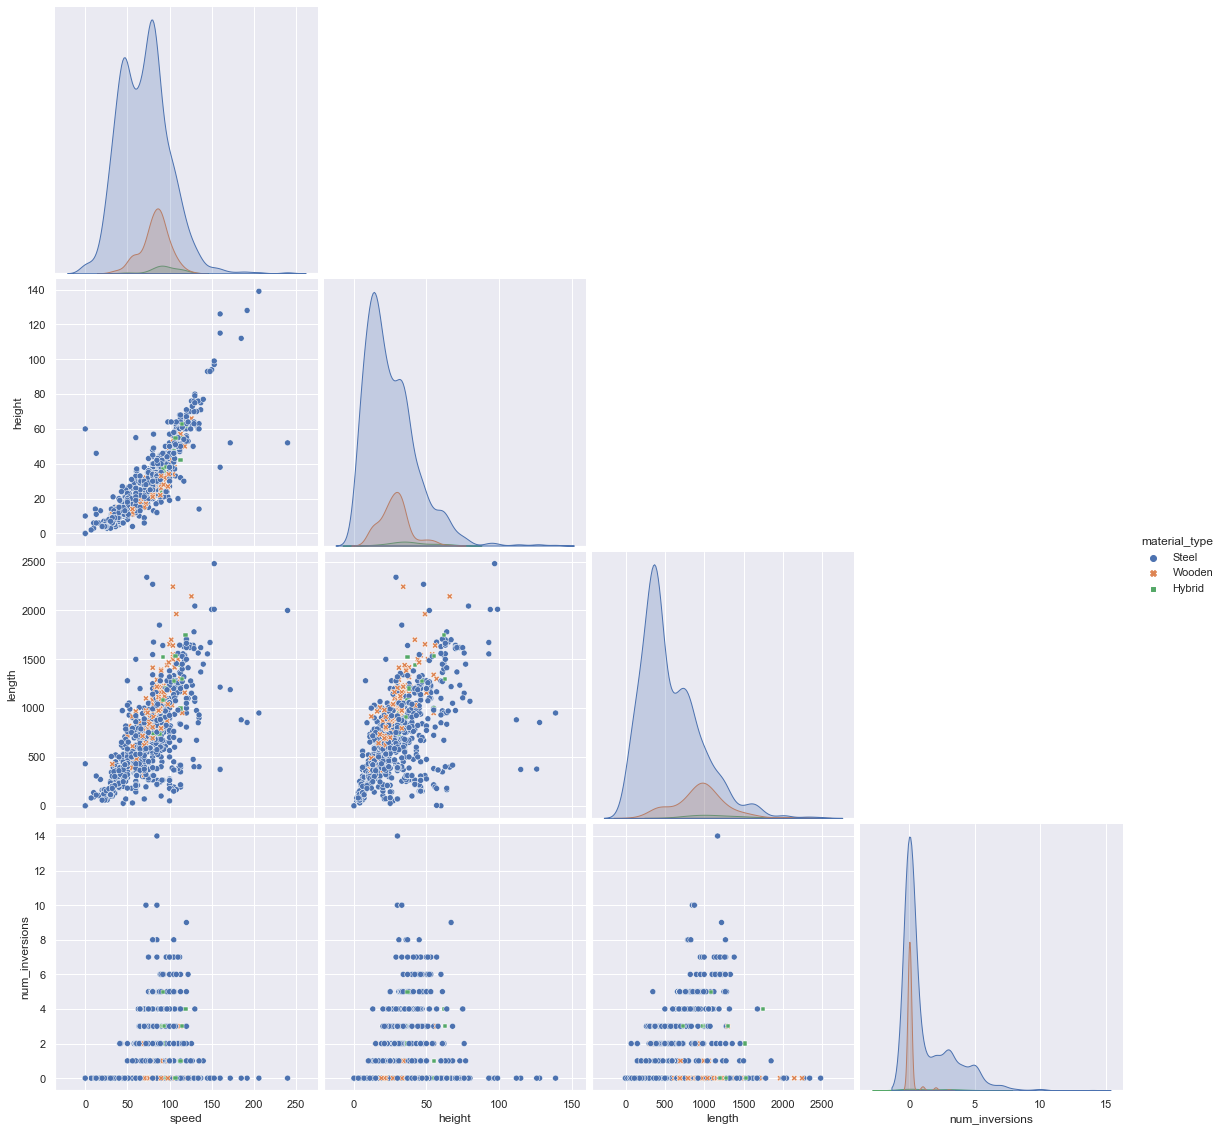

In [51]:
def visualise_scatter(dataset, hue_type):
    dataset = dataset[(dataset['height'] < 180)]

    sns.pairplot(dataset, hue=hue_type, height=4, markers=True, corner=True)
    
    return plt.show()

visualise_scatter(roller_coast_list, 'material_type')

3.6.2. To check correlations with materials from numbers side we need to encode materials column to make it useful for stats calculations. 

In [52]:
materials_encoded = pd.get_dummies(data= roller_coast_list, columns=['material_type'])
materials_encoded.head(4)

,name,seating_type,speed,height,length,num_inversions,manufacturer,park,status,material_type_Hybrid,material_type_Steel,material_type_Wooden
0,Goudurix,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating,0,1,0
1,Dream catcher,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating,0,1,0
2,Alucinakis,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating,0,1,0
3,Anaconda,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating,0,0,1


3.6.3. Now let's check out the data for some correlations with materials. 

In [53]:
materials_corr = materials_encoded.corr()
materials_corr

,speed,height,length,num_inversions,material_type_Hybrid,material_type_Steel,material_type_Wooden
speed,1.000000,0.369112,0.664873,0.350204,0.096901,-0.084599,0.146394
height,0.369112,1.000000,0.240986,0.156852,0.041321,0.002957,0.012764
length,0.664873,0.240986,1.000000,0.222719,0.136931,-0.160228,0.290627
num_inversions,0.350204,0.156852,0.222719,1.000000,0.038274,0.015077,-0.121930
material_type_Hybrid,0.096901,0.041321,0.136931,0.038274,1.000000,-0.144658,-0.023371
material_type_Steel,-0.084599,0.002957,-0.160228,0.015077,-0.144658,1.000000,-0.447708
material_type_Wooden,0.146394,0.012764,0.290627,-0.121930,-0.023371,-0.447708,1.000000


3.6.4. Looks promissing, but better to make it visual, let's make a heatmap function. 

In [54]:
def visualise_heatmap(dataset_corr, corr_objects):
    # Prepare figure
    plt.figure(figsize = (21,12))

    # Make plot triangle
    mask = np.triu(np.ones_like(dataset_corr, dtype=bool))

    plt.title(' Correlations of ' + corr_objects, fontsize= 'x-large')
    plt.xticks(rotation=45)

    # Draw heatmap
    heatmap = sns.heatmap(dataset_corr, annot=True, vmax=1, vmin=-1, cmap='BrBG', mask=mask)
    return heatmap

<AxesSubplot:title={'center':' Correlations of Roller Coaster Materials and Other Physical Parameters'}>

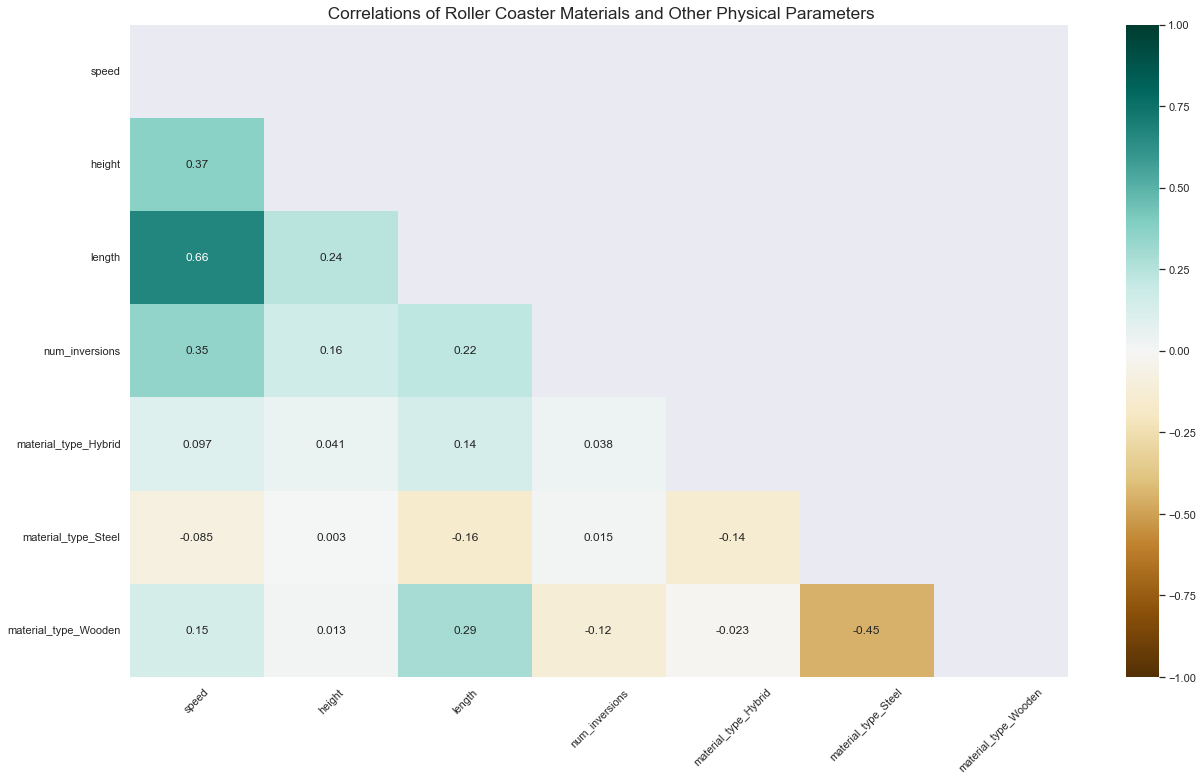

In [55]:
# Draw heatmap with materials
visualise_heatmap(materials_corr, 'Roller Coaster Materials and Other Physical Parameters')

#### Summary:

Most of the coasters are made of steel and have no inversions, but there are some interesting observations that we can summarise.

- **Speed and Length relationships:**
    - The most significant positive correlation among all values exist between speed and length in general it's `0.66`. Meaning the greater the speeds the longer the coasters, which is quite intuitive. 
    - While having less in speed wooden coasters are tend to be longer. 
    - Hybrids are even longer than wooden ones and a bit faster.
    - A few fastest and longest (speed around `200 km/h` and `2km` length) are roller coasters from steel but they are outliers.


- **Height and Length relationships:**
    - There is a small but significant positive correlation (`0.29`) between wooden material type and length of roller coasters, proving that most wooden coasters tend to be longer (`700-1500 m.`) than higher (`20-40 m.`) with a few outliers with the heights around `60 meters`. 
    - Steel coasters can vary on heights and lengths there is no correlations. 
    - Hybrids can be generally higher than wooden ones as well as quite long. 
    - Extraordinary heights (`140 m.` and higher) have only outliers of steel roller coasters, while extraordinary lengths (`2 km.` and more) can have both wooden and steel outliers. 


- **Speed and Height relationships:**
    - There is a significant positive correlation between speed and height - `0.37`. Meaning the higher the speed can be achieved the higher roller coaster itself tend to be.  
    - Wooden coasters tend to have a bit higher general speeds (`70-100 km/h`) but not comparing to steel ones, but only because they tend to be longer. We can even see small correlation (`0.15`) proving it. They also are less high than average steel coasters, that tend to be about `40-50 m`.
    - Hybrids have a bit more average heights (`50-60 m.`) than wooden ones.
    - Really fast (`250 km/h`) and high (`140 m.` and higher) coasters are made of steel, they are also ouliers.


- **Speed and Inversions relationships:**
    - Most coasters of all materials have no inversions. There is a medium positive correlation between speed and number of inversions in general - `0.35`. It means that to perform inversion speed should be quite high, but not too high. As we can see on the graphs, there are no inversions after `150 km/h`. 
    - Wooden coasters tend to have either no inversions or `1-4` inversions and a speed of about `70-100 km/h`. 
    - Hybrids, while being a minority, have either no inversions or `1-5` of them and a speed of about `100 km/h`. 
    - From `6-14` inversions can have only coasters from steel. Those with many inversions tend to have small speeds around `20-40 km/h`. The fastest steel coasters have either no inversions and speeds around `250 km/h` or `1-7` inversions but with speeds around `150 km/h` and less.


- **Height and Inversions relationships:**
    - Wooden coasters have less in heights (`20-40 m.`) and in most cases have no inversions or `1-4` of them. 
    - Hybrids are higher (`50-60 m.`) and have either no inversions or `1-5` of them. 
    - The highest coasters (more than `100 m.`) are made of steel and have no inversions. Coasters with `6-14` inversions have heights around `50 m`. with the tendency: the more inversions they have the lower they become. 

- **Length and Inversions relationships:**
    - While having fewer or no inversions most wooden coasters are longer (`700-1500 m.`).
    - Hybrids are even longer than wooden ones and have either no inversions or `1-5` of them. 
    - While extraordinary lengths can have both wooden and steel coasters (`2-2.5 km.`) those coasters have no inversions. 
    - A significant number of inversions `1-7` have steel or hybrid coasters with lengths of about `900-1000 m`. Although a steel coaster with `14` inversions has a significant length too - about `1000 meters`. 

Note: correlations between materials themselves —  for instance wooden and steel coasters have correlation `-0.45` between them —  have no practical value within this dataset.

#### 3.7. Data Relationships between Seating Types and Other Physical Params
3.7.1. Now let's find out what seating types exist and which ones are the most popular. 

In [56]:
roller_coast_list.seating_type.value_counts()

Sit Down         2217
Spinning          150
Inverted          122
Suspended          55
Alpine             43
Water Coaster      29
Floorless          27
Flying             27
Motorbike          21
Stand Up           20
4th Dimension      18
Wing               17
Bobsleigh          11
Pipeline            5
Name: seating_type, dtype: int64

**"Sit Down"** type is the most popular type with `2217` coasters using it. It is followed by **"Spinning"** `150` and **"Inverted"** `122` types. Other types are used in 55 or less number of coasters.

We are going to "feed" to the scatter function the sitting types, which are used on most roller coasters, to get the visual relationships of the sitting types with length, height, speed and the number of inversions. 

3.7.2. Considering that **"Sit Down"** is used in absolute majority of coasters we are going to create two types of plots and heatmaps:
- with **"Sit Down"**; 
- without it, but with additional sitting types **"Water Coaster"** and **"Floorless"** that is used on `29` and `27` coasters respectively. 

In [57]:
# Save DataFrame with "Sit Down"
by_sit_type = roller_coast_list[roller_coast_list['seating_type'].isin(['Sit Down', 'Spinning', 'Inverted', 'Suspended'])]
# Encode seating type 
by_sit_type_encoded = pd.get_dummies(data=by_sit_type, columns=['seating_type'])
# Find correlations
corr_by_sit_type = by_sit_type_encoded.corr()

# Save DataFrame no "Sit Down"
by_sit_nositdown = roller_coast_list[roller_coast_list['seating_type'].isin(['Spinning', 'Inverted', 'Suspended', 'Water Coaster', 'Floorless'])]
# Encode seating type
by_sit_nositdown_encoded = pd.get_dummies(data=by_sit_nositdown, columns=['seating_type'])
# Find correlations
corr_by_sit_nositdown = by_sit_nositdown_encoded.corr()

Note: We don't use **"Alpine"** because there are too few required data points within it. 

In [58]:
roller_coast_list[roller_coast_list['seating_type'] == 'Alpine'].head(10)


,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
1683,Harzbob,Steel,Alpine,NaN,NaN,NaN,0.0,Wiegand,Erlebniswelt Seilbahnen Thale,status.operating
1684,Bayerwald-Coaster,Steel,Alpine,NaN,NaN,735.0,0.0,Wiegand,Egidi-Buckel Rodelparadies,status.operating
1685,Sommerrodelbahn Abtenau,Steel,Alpine,NaN,NaN,1980.0,0.0,Doppelmayr,Abtenauer Bergbahnen,status.operating
1686,Rittisberg Coaster,Steel,Alpine,NaN,NaN,NaN,0.0,Wiegand,Erlebnis Rittisberg,status.operating
1688,Alpinecoaster,Steel,Alpine,NaN,NaN,720.0,0.0,Wiegand,Alpincenter Bottrop,status.operating
1689,Alpine Coaster,Steel,Alpine,NaN,NaN,435.0,0.0,Wiegand,Parc des Combes,status.operating
2327,Forest Slide,NaN,Alpine,NaN,NaN,560.0,NaN,Wiegand,Hot Go Park,status.operating
2411,Luge,NaN,Alpine,NaN,NaN,680.0,0.0,Wiegand,Ile des Loisirs d'Etampes,status.operating
2455,Alpine Coaster,NaN,Alpine,NaN,NaN,1200.0,NaN,Wiegand,Vinpearl Land Nha Trang,status.operating
2540,Dawson Duel (Right),NaN,Alpine,40.0,25.0,490.0,0.0,Wiegand,Bellewaerde,status.operating


3.7.3. Let's call the scatter plot function with **"Sit Down"** first. 

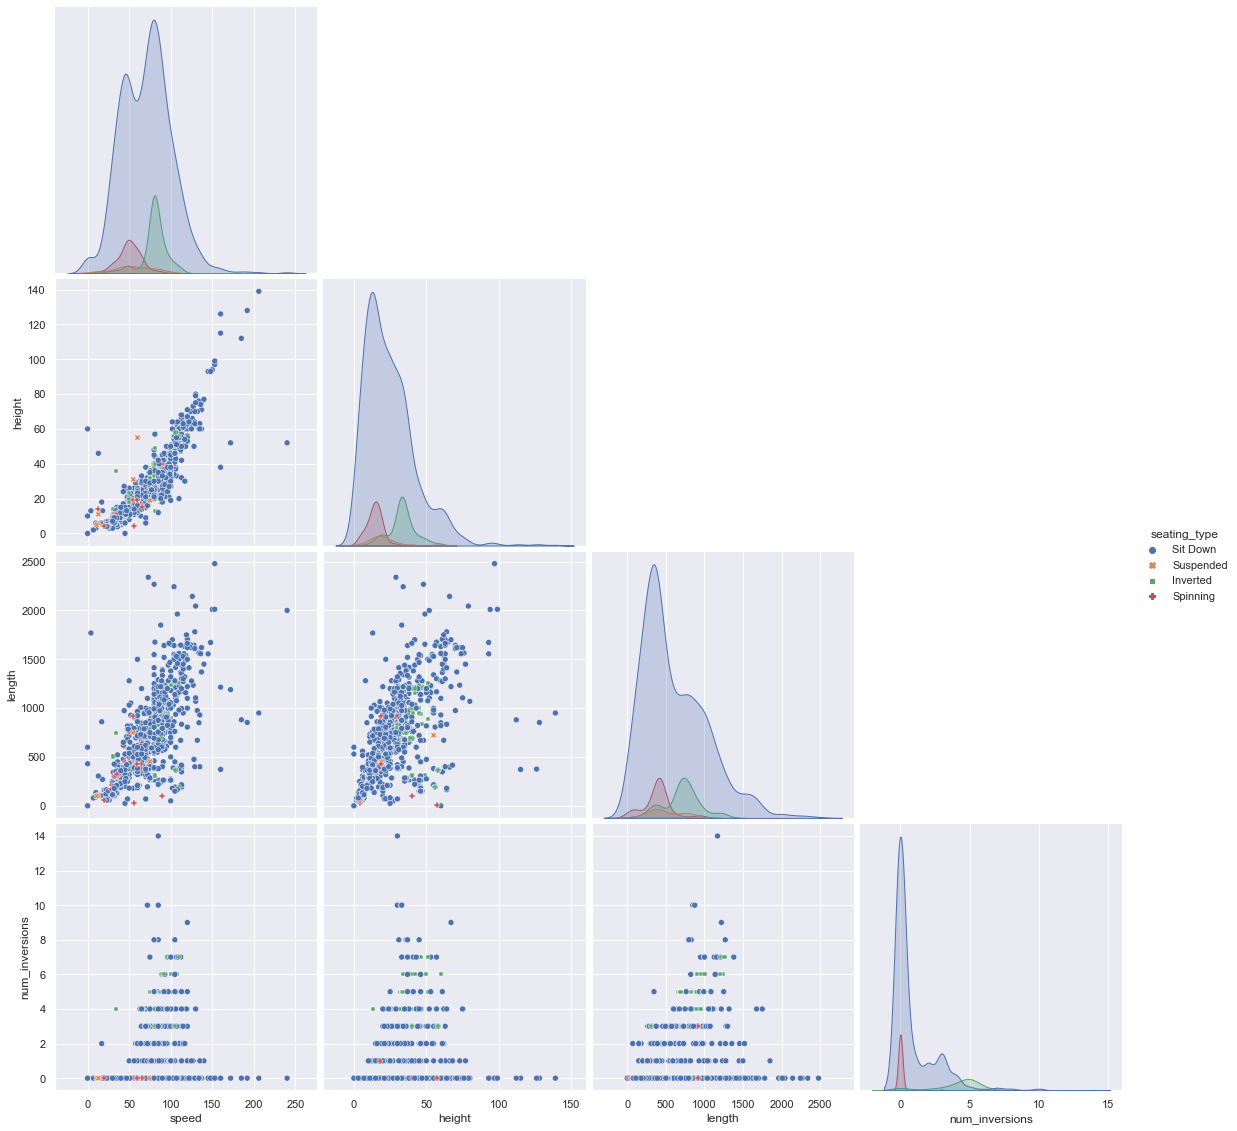

In [59]:
visualise_scatter(by_sit_type, 'seating_type')

- **"Sit Down"** type in general repeats patterns of steel roller coasters. They are dominant in every parameter just because of their number. Other types are very hard to notice. 

3.7.4. Let's check correlations heatmap.

<AxesSubplot:title={'center':' Correlations of Popular Roller Coaster Seating Types and Other Physical Parameters'}>

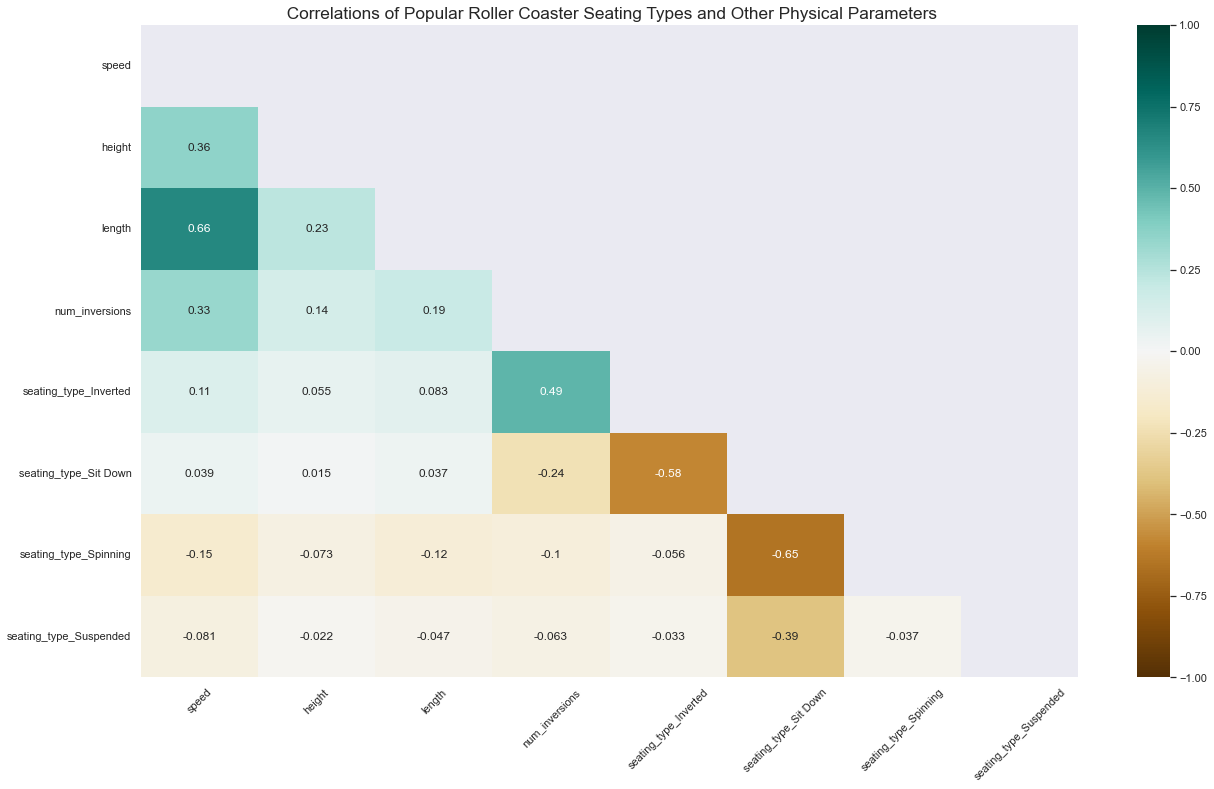

In [60]:
visualise_heatmap(corr_by_sit_type, 'Popular Roller Coaster Seating Types and Other Physical Parameters')

#### Summary:
- We can see that general correlations are almost the same. They differ a bit because we have shortened the dataset a bit, selecting only coasters with the popular seating types. 
- **"Inverted"** seating type has middle positive correlation with inversions - `0.49`.
- **"Sit Down"** has a slight negative correlation with inversions: `-0.24`.
- **"Spinning"** tend to be a bit slower and shorter than others: there is a small negative correlations between this seating type and speed (`-0.15`) and length (`-0.12`). Number of inversions for coasters with spinning seats tend to be smaller with small negative correlation `-0.1`.

Note: correlations between seating types themselves —  for instance **"Sit Down"** and **"Inverted"** have correlation `-0.58` between them — have no practical value within this dataset.


3.7.5. Let's call the scatter plot function without "Sit Down" instead and draw a correlations heatmap.

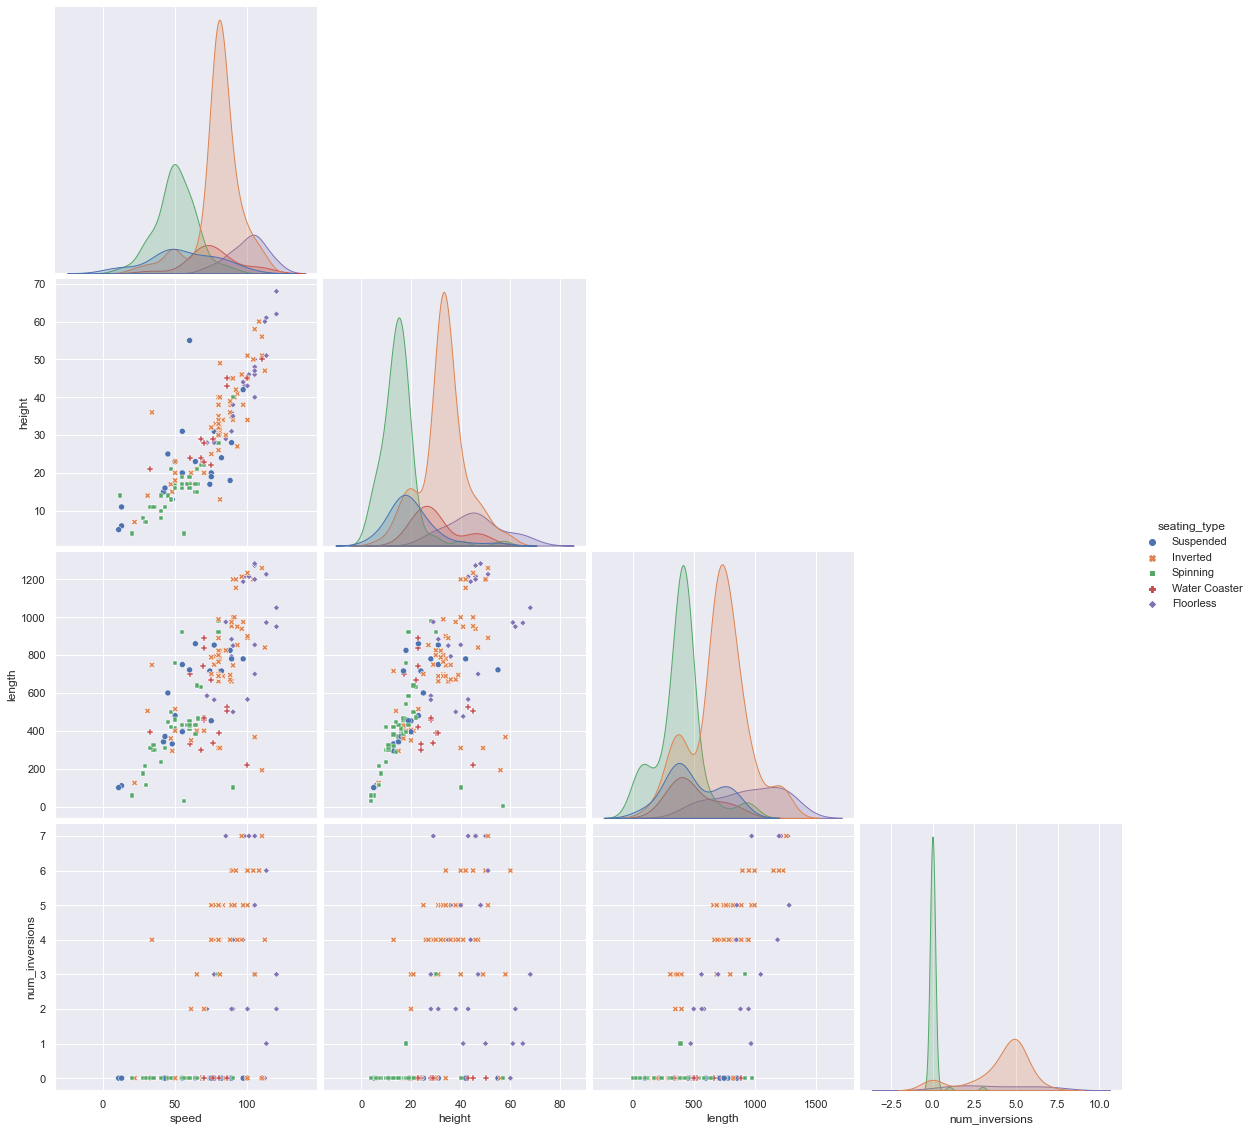

In [61]:
visualise_scatter(by_sit_nositdown, 'seating_type')

<AxesSubplot:title={'center':' Correlations of Popular Roller Coaster Seating Types and Other Physical Parameters'}>

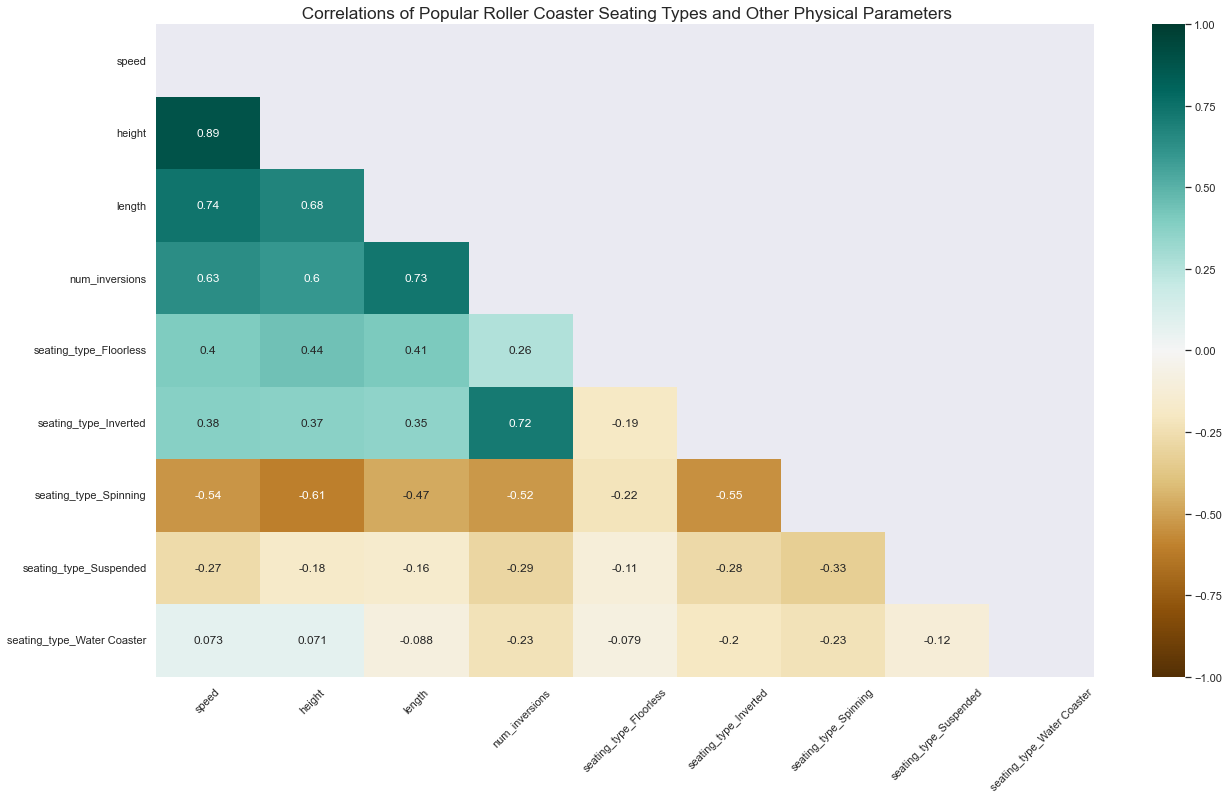

In [62]:
visualise_heatmap(corr_by_sit_nositdown, 'Popular Roller Coaster Seating Types and Other Physical Parameters')

#### Summary:
- General correlations and values: 
    - General correlations became more apparent without **"Sit Down"**. Especially strong have become positive correlations between speed and height (`0.89`) as well as between speed and length (`0.74`). Meaning that the faster a coaster the longer and or higher it should be. 
    - Positive correlation between length and heigth has also increased to `0.68`. Long coasters are also quite oftern high. 
    - General positive correlation between number of inversions and speed, length, heigth also looks more obvious with values increased to `0.63`, `0.73` and `0.6` respectively. 


- Correlations and values according to seating types:
    - **"Floorless"** tend to be significantly faster (around `100 km/h`), higher (`40-70 m.`) and longer (`400-1200 m.`) than others. Coasters with this seating type has positive correlations with speed `0.4`, heigth `0.44`, and length `0.41`. Smaller positive correlation this type has with number of inversions `0.26`, but on the graph we can see that it actually has a varying number of inversions `1-7` with no apparent tendency. 
    - **"Inverted"** seating type in this DataFrame has even more apparent positive correlation with inversions: `0.72`. Many coasters with inverted seated have `3-7` inversions. Other parameters also have significant positive correlations (speed `0.38`, heigth `0.37`, lenth `0.35`), meaning coasters also tend to be quite fast, high and long although a bit less than **"Floorless"**.
    - **"Spinning"** in this DataSet is significantly slower (`30-60 km/h`) and shorter (length about `400 m.`, heigth `3-30 m.`) than others: there is a medium or high negative correlations between this seating type and speed `-0.54`, heigth `0.61` length `-0.47`. Number of inversions for coasters with spinning seats in this set is even smaller, with negative correlation `-0.52`. But it the main "twerk" of these seats actually exactly in the fact that they spin so there's enough "fun" as it is.  
    - **"Suspended"** type has small negative correlations with speed `-0.27`, lengths `-0.16`, height `-0.18` and number of inversions (`-0.29`) and judging by the graphs they are more scattered across all directions far from the graphs' central lines. Meaning that they can a bit slower, and shorter but the tendencies are not too apparent. These coasters have speeds around `10-100 km/h`, lengths around `100-900 m.` and heigths around `5-55 m.`
    - Judging by the graphs **"Water Coaster"** type has no correlations and no inversions even thought there is shown a small correlation with inversions. These coasters have speeds around `30-100 km/h`, lengths around `200-1000 m.` and heigths around `20-50 m.`

Note: correlations between seating types themselves —  for instance **"Spinning"** and **"Inverted"** have correlation `-0.55` between them — have no practical value within this dataset.



### 4. Manufactures spesialisations

We will find which manufacturers specialise in what roller coasters: fast or slow, what types of seats they produce etc. To do it, we first need to specify some criteria for our basic parameters. It will help us determine whether or not the resulting calculations are adequate enough to establish a "manufacturer's specialisation".

Speed:
- `slow`: < 50 km/h
- `medium`: < 100 km/h
- `fast`: > 100 km/h

Height:
- `low`: < 20 m.
- `medium`: < 40 m.
- `high`: > 40 m.

Length:
- `not long`: < 500 m.
- `medium`: < 1000 m.
- `long`: > 1000 m.

Inversions:
- `no inversions`: 0 times
- `with inversions`: 1-14 times

After that we need to create visualisations to show manufacturers specialisations within each of these measurments. 

#### 4.1. Speed

4.1.1. We will start with the "Speed" parameter. First, we are going to create function that contains measurment ( in this case 'speed') types corresponding to the specified criteria and assign these types to each speed value as a separate column. The function will be used as chengeble parapeter to the second function since we have different types of measurments and different criteria. It will return index number of a speed type when other function will give it a speed value. 

In [63]:
def group_by_speed(index):
    # Assign each coaster a speed type
    speed_types = {
        0: 'slow: < 50 km/h',
        1: 'medium: < 100 km/h',
        2: 'fast: > 100 km/h'
    }
    # Assign speed type index to each value of speed column except NaN
    group_id = min(roller_coast_list.loc[index].speed // 50, 2)
    if np.isnan(group_id):
        return np.nan
    return speed_types[group_id]

4.1.2. As a result of the next function we need 2 dataframes: one for each type of plot on our future visualisation. Barplot will require: 
- percentages of coasters of the each measurement type produced within a company; 
- measurements types as a separate column;
- list of manufacturers names.

Lineplot: 
- list of manufacturers names;
- total number of produced coasters of all types for a company.

We'll calculate values for both DataFrames within one function and save it into different variables. 

Note: as a rule we are going to visualise only those companies that have produced more than 6 coasters. Considering that roller coasters are not an easy thing to produce, certan tendency will be more or less apparent starting already from 6 coasters or so. 

In [64]:
def find_specialisations(grouping_by_types, n):
    
    # Group by manufacturer and given measurment types, count number of coasters within resulting groups
    manuf_by_types = roller_coast_list.groupby(['manufacturer', grouping_by_types]).size().reset_index(name='count')
    
    # Rename autogenerated name 'level_1' to 'types'
    manuf_by_types.rename(columns={
        'level_1': 'types'
    }, inplace=True)

    def find_part_of_whole(index):
        dictionary = {}
        dictionary['total'] = index['count'].sum()
        index['part_of_whole'] = index['count'] / dictionary['total']
        dictionary['propotions_by_types'] = sorted(index[['part_of_whole', 'types']].values.tolist(), reverse=True)
        return pd.Series(dictionary, index=['propotions_by_types', 'total'])

    # Apply groupping and apply sorting
    groups_bymanuf = manuf_by_types.groupby('manufacturer').apply(find_part_of_whole).reset_index().sort_values(by='total', ascending=False)
    
    # Filter manufacturers to get only those that produced more than n coasters
    groups_bymanuf = groups_bymanuf[groups_bymanuf.total >= n]
    
    # Reset old indexes
    groups_bymanuf = groups_bymanuf.reset_index(drop=True)

    # Make each list of proportions_by_types separate observation
    manuf_specialisation = groups_bymanuf.explode('propotions_by_types')
    
    # Find percentages from each observation of proportions
    manuf_specialisation['percentage'] = manuf_specialisation['propotions_by_types'].apply(lambda x: round(x[0] * 100))
    
    # Add type of each observation as separate column 
    manuf_specialisation['type'] = manuf_specialisation['propotions_by_types'].apply(lambda x: x[1])
    
    return manuf_specialisation, groups_bymanuf

manuf_specialisation_speed, speed_groups_bymanuf = find_specialisations(group_by_speed, 6)
manuf_specialisation_speed

,manufacturer,propotions_by_types,total,percentage,type
0,Vekoma,"[0.7257383966244726, medium: < 100 km/h]",237,73,medium: < 100 km/h
0,Vekoma,"[0.22362869198312235, slow: < 50 km/h]",237,22,slow: < 50 km/h
0,Vekoma,"[0.05063291139240506, fast: > 100 km/h]",237,5,fast: > 100 km/h
1,Intamin,"[0.568, medium: < 100 km/h]",125,57,medium: < 100 km/h
1,Intamin,"[0.416, fast: > 100 km/h]",125,42,fast: > 100 km/h
...,...,...,...,...,...
27,William J. Cobb,"[0.14285714285714285, fast: > 100 km/h]",7,14,fast: > 100 km/h
28,Beijing Shibaolai,"[0.6666666666666666, medium: < 100 km/h]",6,67,medium: < 100 km/h
28,Beijing Shibaolai,"[0.3333333333333333, slow: < 50 km/h]",6,33,slow: < 50 km/h
29,Sansei Yusoki,"[0.8333333333333334, slow: < 50 km/h]",6,83,slow: < 50 km/h


4.1.3. Now we we'll create a generic visualisation function that will help us determine not only specialisations based on speed types, but also based on criteria selected of other parameters like heights, length etc. 

In [65]:
def visualise_specialisation(plot, groups_bymanuf, measurment): 
    # Set up grid
    fig, ax1 = plt.subplots(figsize = (30,10))

    # Plot Speed Types in %
    ax1 = plot(ax1)
    # Set legend for Speed Types in %
    ax1.legend(
        title='Types in %',
        fontsize='large',
        title_fontsize='large',
        loc='upper right',
        bbox_to_anchor=(1.11, 0.9, 0.04, 0.01)
        )

    # Combine barplot and lineplot
    ax2 = ax1.twinx()

    # Plot Totally Produced
    ax = sns.lineplot(
        y=groups_bymanuf.total,
        x=groups_bymanuf.manufacturer,
        marker='o',
        estimator=None, 
        ax=ax2
        )
        
    # Set legend for Totally Produced
    ax.legend(
        ['Total number of produced\nroller coasters per company'], 
        fontsize='large',
        loc='upper right', 
        bbox_to_anchor=(1.138, 1, 0.04, 0.01))

    # Set main title
    plt.title('Manufacturers Specialisatition, based on Roller Coasters ' + measurment, fontsize = 'xx-large')

    # Set title of y axis for Totally Produced 
    ax2.set_ylabel('Totally Produced', fontsize = 'large')
    # Set title of y axis for Speed Types in % 
    ax1.set_ylabel('Percentages', fontsize = 'large')
    # Set title of x axis for Speed Types in % 
    ax1.set_xlabel('Manufacturers', fontsize = 'large')

    # Set Manufacturers' Names on x axis as ticks
    ax1.set_xticklabels(groups_bymanuf.manufacturer,
    rotation=45, 
    horizontalalignment='right', 
    fontsize = 'large')

    # Set margins 
    ax1.margins(0.02)
    ax2.margins(0.02)

    return plt.show()

4.1.4. Considering that visualisation function is generic, we need to pass to it several parameters that depend on each measurment type. We are going to use lambda function that plots the whole barplot and accepts custom params from the previous functions. 

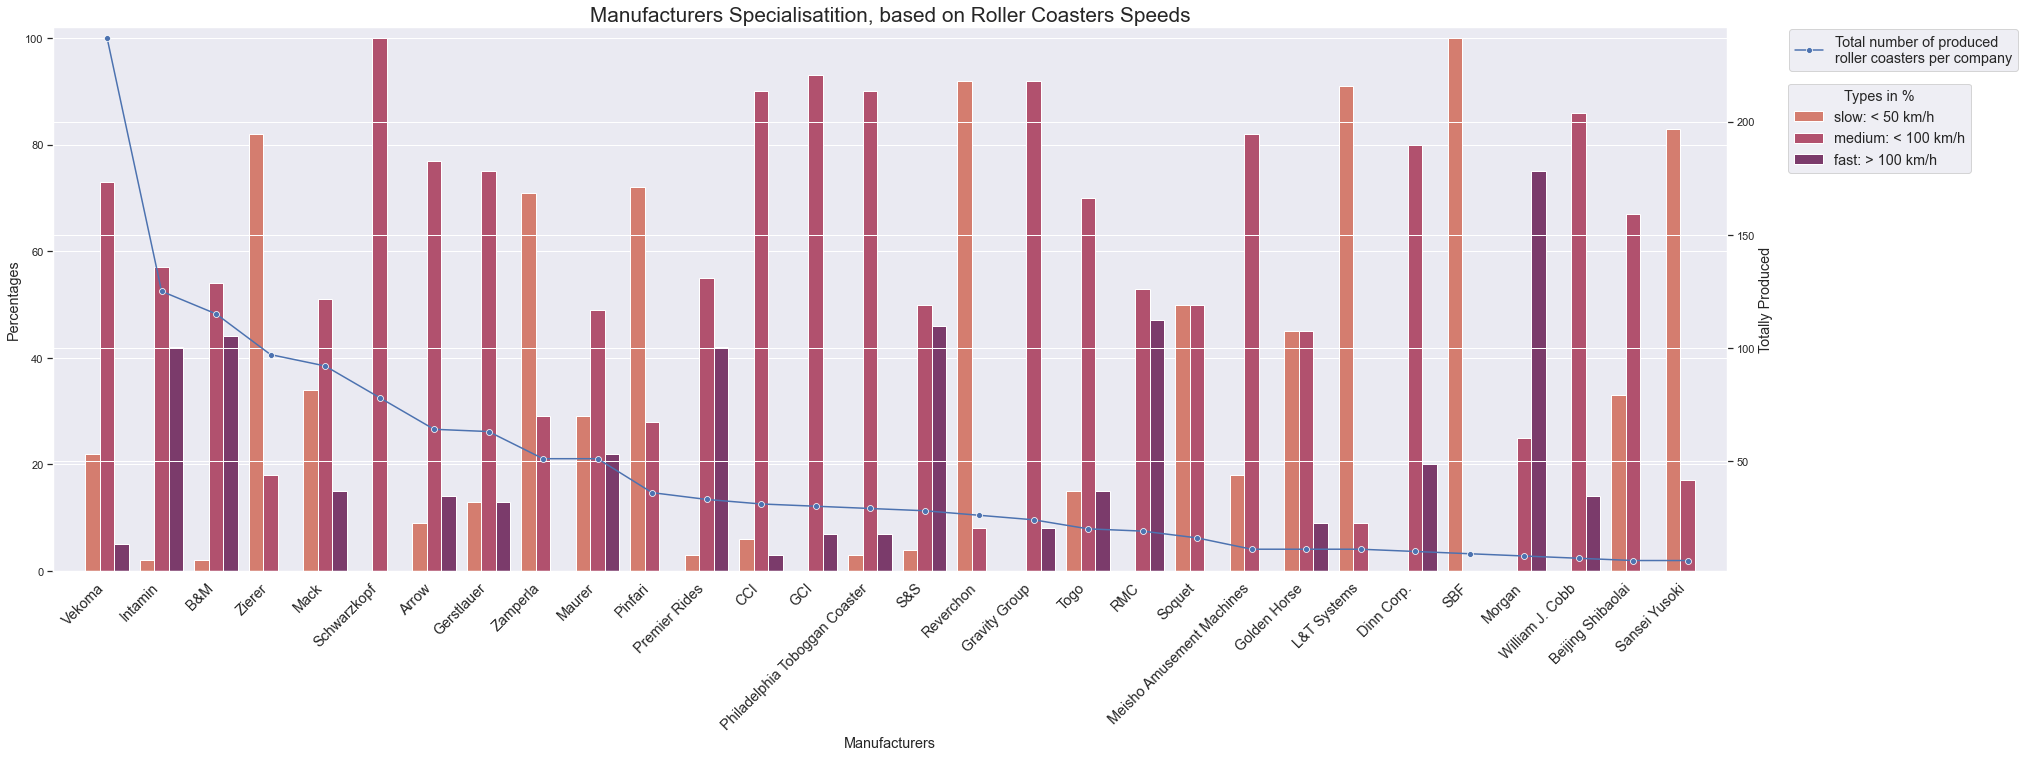

In [66]:
# Draw barplot with "speed" DataFrame
visualise_specialisation(
    # Barplot as argument
    plot = lambda ax: sns.barplot(
    y = manuf_specialisation_speed.percentage,
    x = manuf_specialisation_speed.manufacturer, 
    hue=manuf_specialisation_speed.type, 
    hue_order=['slow: < 50 km/h', 'medium: < 100 km/h', 'fast: > 100 km/h'],
    palette= 'flare',
    ax=ax,
),  
    # DataFrame for lineplot as argument
    groups_bymanuf = speed_groups_bymanuf,
    # Measurment name for title  
    measurment = 'Speeds')

#### Summary:
- Among 30 manufacturers, most engaged in production of *medium speed* (`below 100 km/h`) roller coasters. Some even made it their only specialisation, like **"Schwarzkopf"**.

- Only about 30% of manufacturers have produced more than 50 roller coasters of any speed type. 

- Some companies have more clear specialisaton, like **"Morgan"** for instance. They have produced more high speed coasters than any other type. They also do not produce slow coasters, so their specialisation could be more easily determined as *high speed* (`above 100 km/h`) coasters production, even though they produced much less fast coasters than **"Intamin"**.

- **"Intamin"** and **"B&M"** have produced about 120 coasters each and their specialisation can be determined as *medium and high speed* coasters production, considering that production of slow coasters is quite low in both companies. 

- **"Zierer"**, **"Zamperla"**, **"Pinfary"**, **"Reverchon"** and some others specialise on *low speed* (`below 50 km/h`) coasters producation. They don't produce high speed coasters at all. 


#### 4.2. Height

Now we are going to check the height of produced roller coasters within each company. To do it we need to prepare the following data within single DataFrame: 
- percentages of coasters of the each heigth type produced within a company; 
- list of manufacturers names.

We are going to use the functions above to get it. 

4.2.1. First we'll customise the function that contains measurment types and assign these types to `height` culumn values. Then call function that finds specialisations and save its result to 2 dataframes. After what we customise parameters of visualisation function with obtained dataframes and types of heights. All this in one step.  

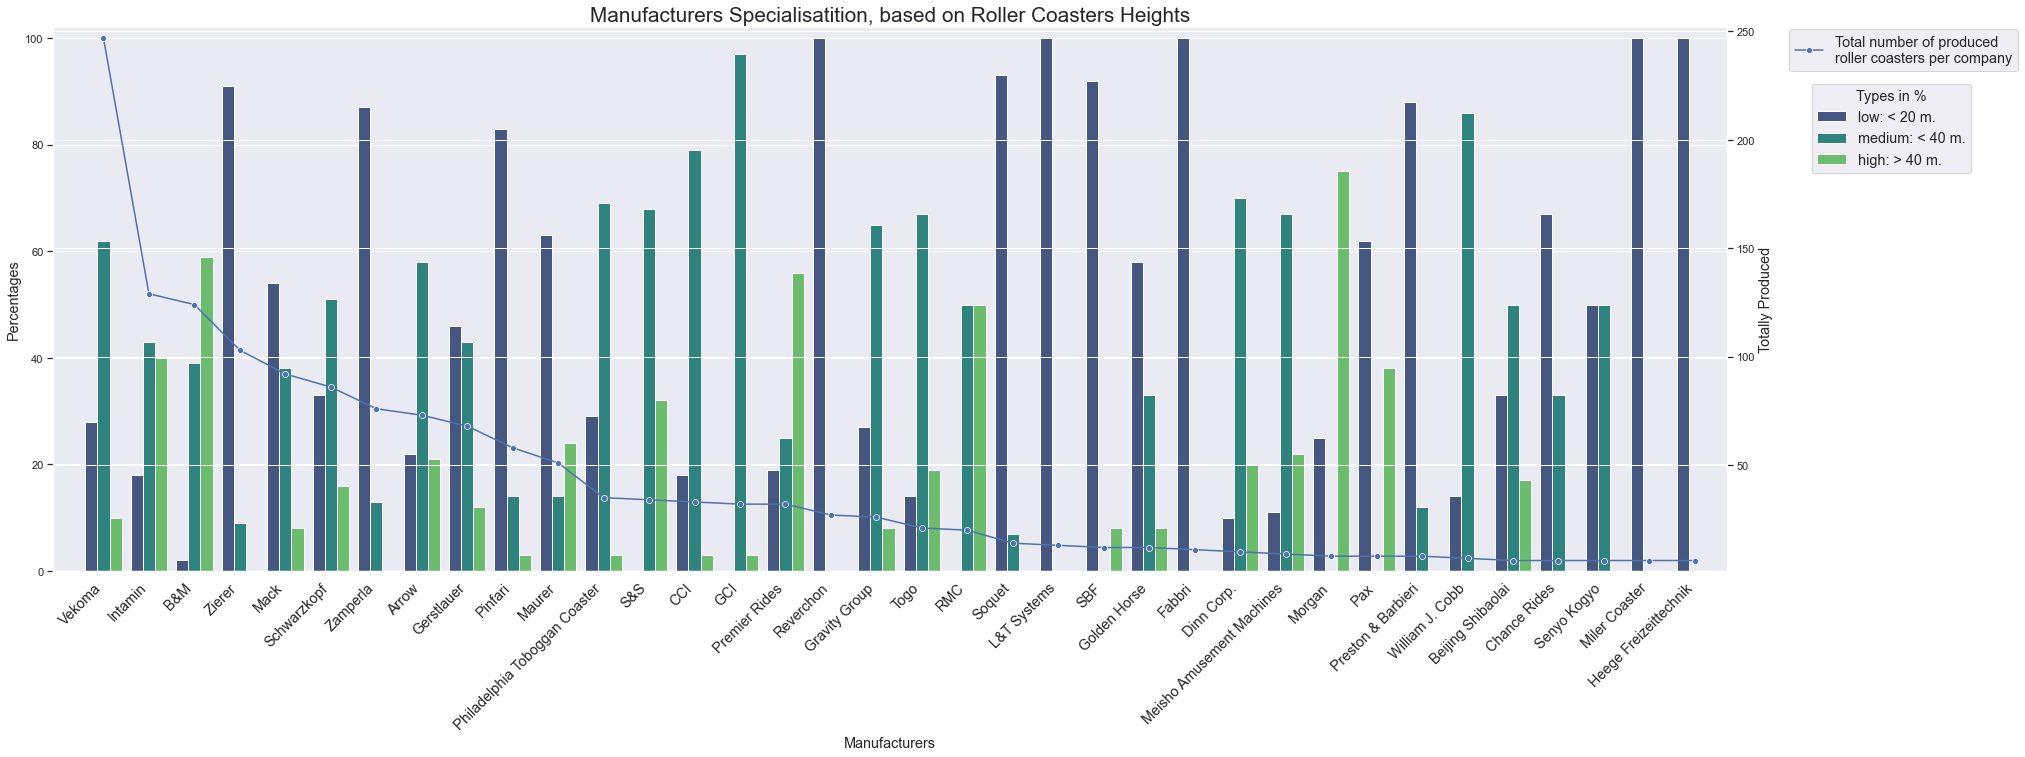

In [67]:
def group_by_height(index):
    # Assign each coaster a height type
    height_types = {
        0: 'low: < 20 m.',
        1: 'medium: < 40 m.',
        2: 'high: > 40 m.'
    }

    # Assign height type index to each value of height column except NaN
    group_id = min(roller_coast_list.loc[index].height // 20, 2)
    if np.isnan(group_id):
        return np.nan
    return height_types[group_id]

manuf_specialisation_height, height_groups_bymanuf = find_specialisations(grouping_by_types=group_by_height, n=6)

# Draw barplot with "height" DataFrame
visualise_specialisation(plot = lambda ax: sns.barplot(
    y = manuf_specialisation_height.percentage,
    x = manuf_specialisation_height.manufacturer, 
    hue=manuf_specialisation_height.type, 
    hue_order=['low: < 20 m.', 'medium: < 40 m.', 'high: > 40 m.'],
    palette= 'viridis',
    ax=ax,
),  
    # DataFrame for lineplot as argument
    groups_bymanuf= height_groups_bymanuf,
    # Measurment name for title  
    measurment = 'Heights'
)

#### Summary:

- Most companies specialise on roller coasters with the heigth `less than 20 m.` 

- Manufacturers of `high` coasters are tend to be the same that produce the `fastest` ones, that is also confirmed by general correlation between hight and speed. 

- **"Reverchon"**, **"L&T Systems"**, **"Miller Coaster"**, **"Fabbri"** and **"Heege Freizeittechnik"** produce only `low` heigth coasters.

- The biggest manufacturer **"Vekoma"** as well as **"Schwarzkopf"**, **"Arrow"**, **"Philadelphia Toboggan Coaster"**, **"S&S"** and some others specialize primarly on coasters with the height `below 40 m.`

- **"Intamin"** produced about 120 `low, medium and high` roller coasters. One can say that they specialise on both medium and high coasters because they have produced them in roughly equal amounts.

- **"RMC"** focused equally but exclusively on `medium and high` roller coasters, though they produced about 20 coasters in total.

- **"B&M"**, **"Premier Rides"** and **"Morgan"** are more focused on `high` coasters.

#### 4.3. Length

4.3.1. Now we do the same but with the `length` measurment.

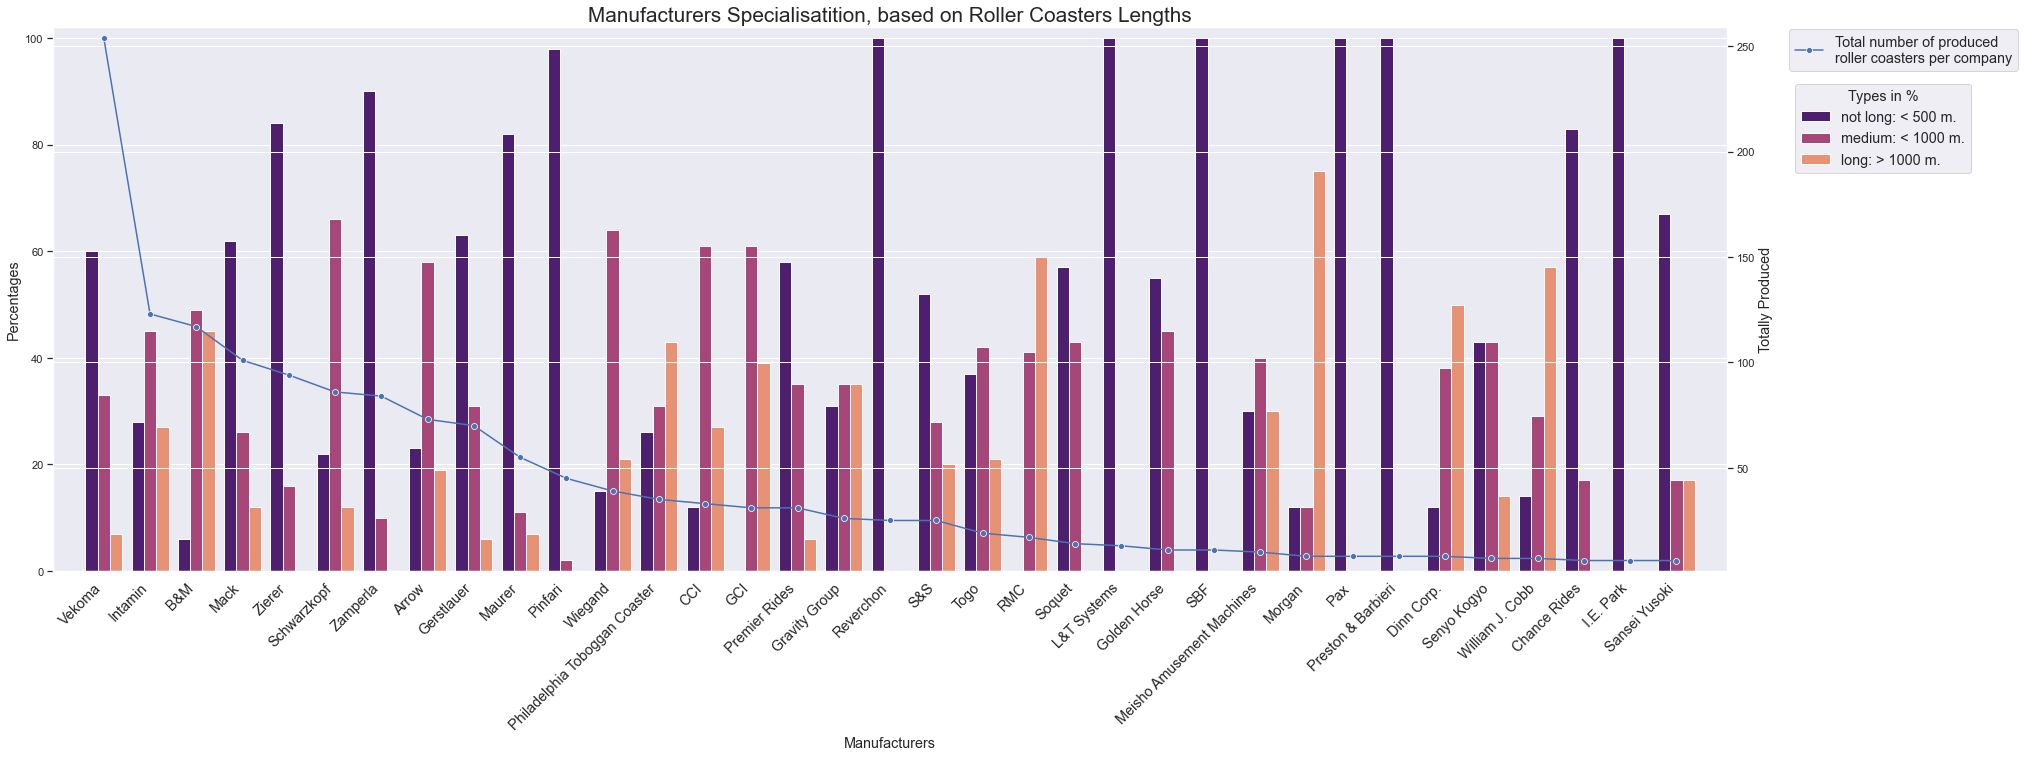

In [68]:
def group_by_length(index):
    # Assign each coaster a length type
    length_types = {
        0: 'not long: < 500 m.',
        1: 'medium: < 1000 m.',
        2: 'long: > 1000 m.'
    }

    # Assign length type index to each value of length column except NaN
    group_id = min(roller_coast_list.loc[index].length // 500, 2)
    if np.isnan(group_id):
        return np.nan
    return length_types[group_id]

manuf_specialisation_length, length_groups_bymanuf = find_specialisations(grouping_by_types=group_by_length, n=6)

# Draw barplot with "length" DataFrame  
visualise_specialisation(plot = lambda ax: sns.barplot(
    y = manuf_specialisation_length.percentage,
    x = manuf_specialisation_length.manufacturer, 
    hue=manuf_specialisation_length.type, 
    hue_order=['not long: < 500 m.', 'medium: < 1000 m.', 'long: > 1000 m.'],
    palette= 'magma',
    ax=ax,
),  
    # DataFrame for lineplot as argument
    groups_bymanuf= length_groups_bymanuf, 
    # Measurment name for title  
    measurment = 'Lengths')

#### Summary: 
- `17` out of 35 Manufactureres are focused on production of roller coasters with length `less than 500 m`. **"Reverchon"**, **"L&T Systems"**, **"SBF"**, **"Pax"**, **"Preston & Barbieri"** and **"I.E. Park"** are specialise only on this kind of coasters. 

- `7` Manufacturers produce more `medium length` coasters than other kinds. The most significant numbers of produced coasters among them have such companies as **"Intamin"**, **"Schwarzkopf"**, **"Arrow"**, **"Wiegand"**, **"CCI"** and **"GCI"**. 

- **"Philadelphia Toboggan Coaster"**, **"RMC"**, **"Morgan"**, **"Dinn Corp."** and **"William J. Cobb"** produce primarly `long` coasters. 



#### 4.4. Inversions

4.4.1. Let's apply the similar methods to visualise inversions. Only now we are going to devide manufacturers on only 2 types:
- those who produces coasters with inversions and,
- those who without.

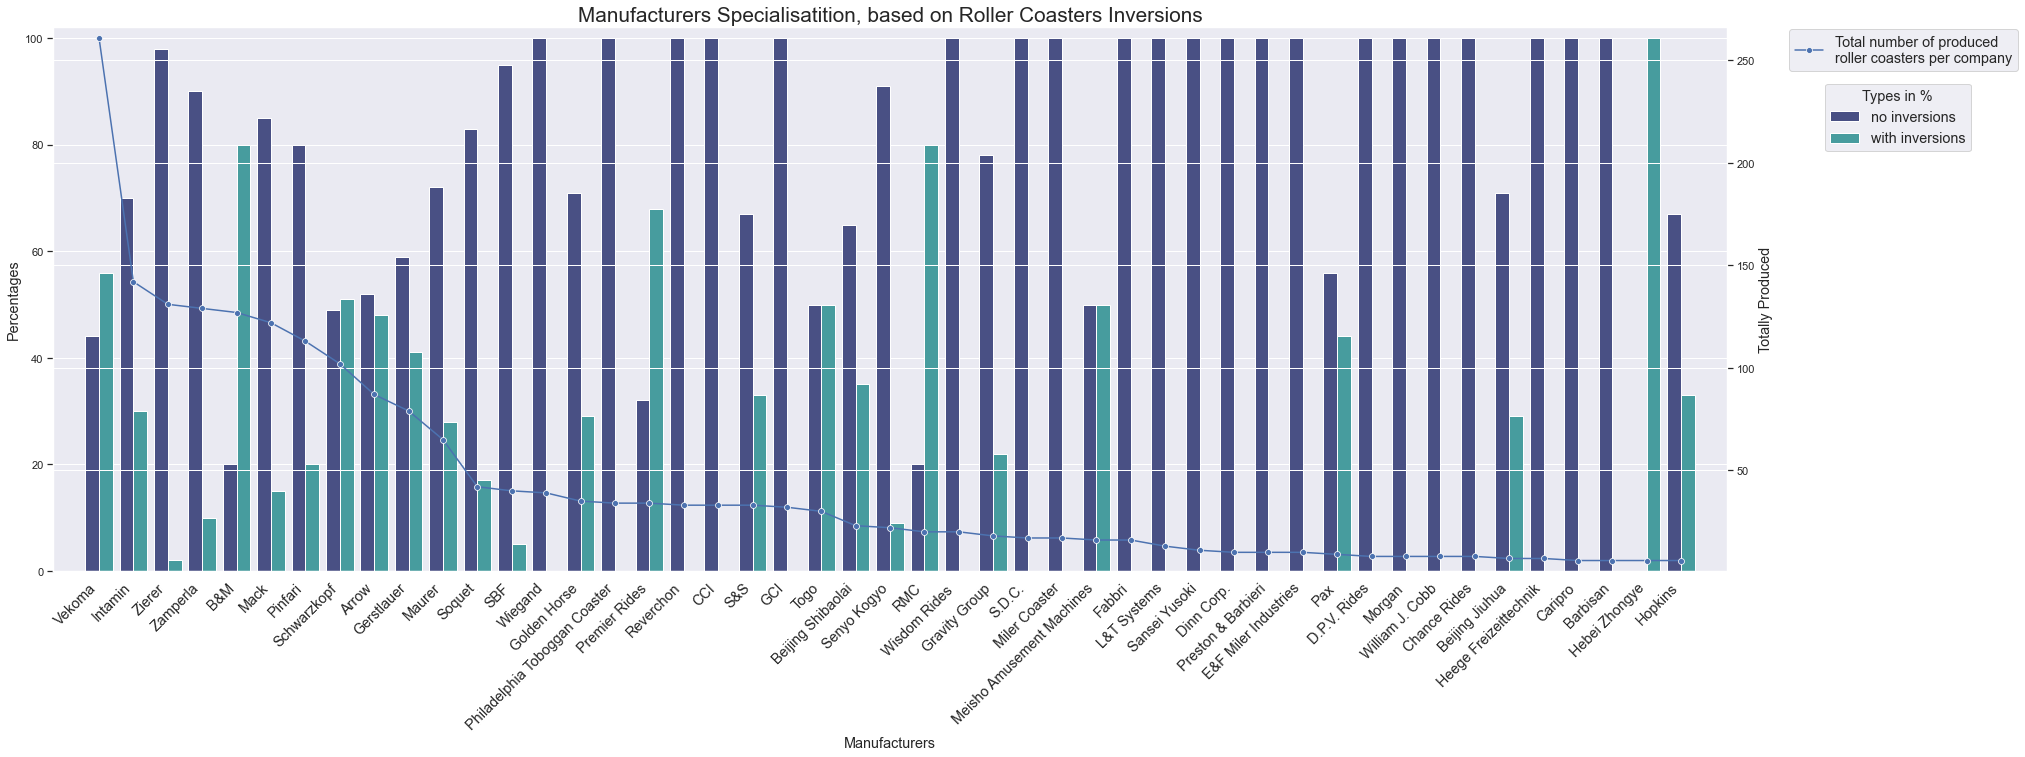

In [69]:
def group_by_inversions(index):
    # Assign each coaster a inversions type
    inversions_types = {
        0: 'no inversions',
        1: 'with inversions'
    }
    if np.isnan(roller_coast_list.loc[index].num_inversions): 
        return np.nan
    # Assign inversions type index to each value of inversions column except NaN
    return inversions_types[0 if roller_coast_list.loc[index].num_inversions == 0 else 1]

manuf_specialisation_inversions, inversions_groups_bymanuf = find_specialisations(grouping_by_types=group_by_inversions, n=6)

# Draw barplot with "inversions" DataFrame  
visualise_specialisation(plot = lambda ax: sns.barplot(
    y = manuf_specialisation_inversions.percentage,
    x = manuf_specialisation_inversions.manufacturer, 
    hue=manuf_specialisation_inversions.type, 
    hue_order=['no inversions', 'with inversions'],
    palette= 'mako',
    ax=ax,
),  
    # DataFrame for lineplot as argument
    groups_bymanuf= inversions_groups_bymanuf, 
    # Measurment name for title  
    measurment = 'Inversions')

#### Summary:
- `21` Manufacturers out of 47 produce coasters `without inversions`. 

- The rest produce both with inversions and without them, in many cases propostion is close to 50/50.

- **"Vekoma"**, **"B&M"**, **"Prmier Rides"**, **"RMC"** are focused mainly on coasters with inversions. 

- **"Hebei Zhongye"** produces only coasters with inversions, though it has made less than 10 of them.


#### 4.5. Seating types

4.5.1. There are many seating types, so we are going to additionally devide the list of manufacturers on those who have produced: 
- more than 50 roller coasters;
- less than 50 but more than 10.

This will result in 2 separate plots.

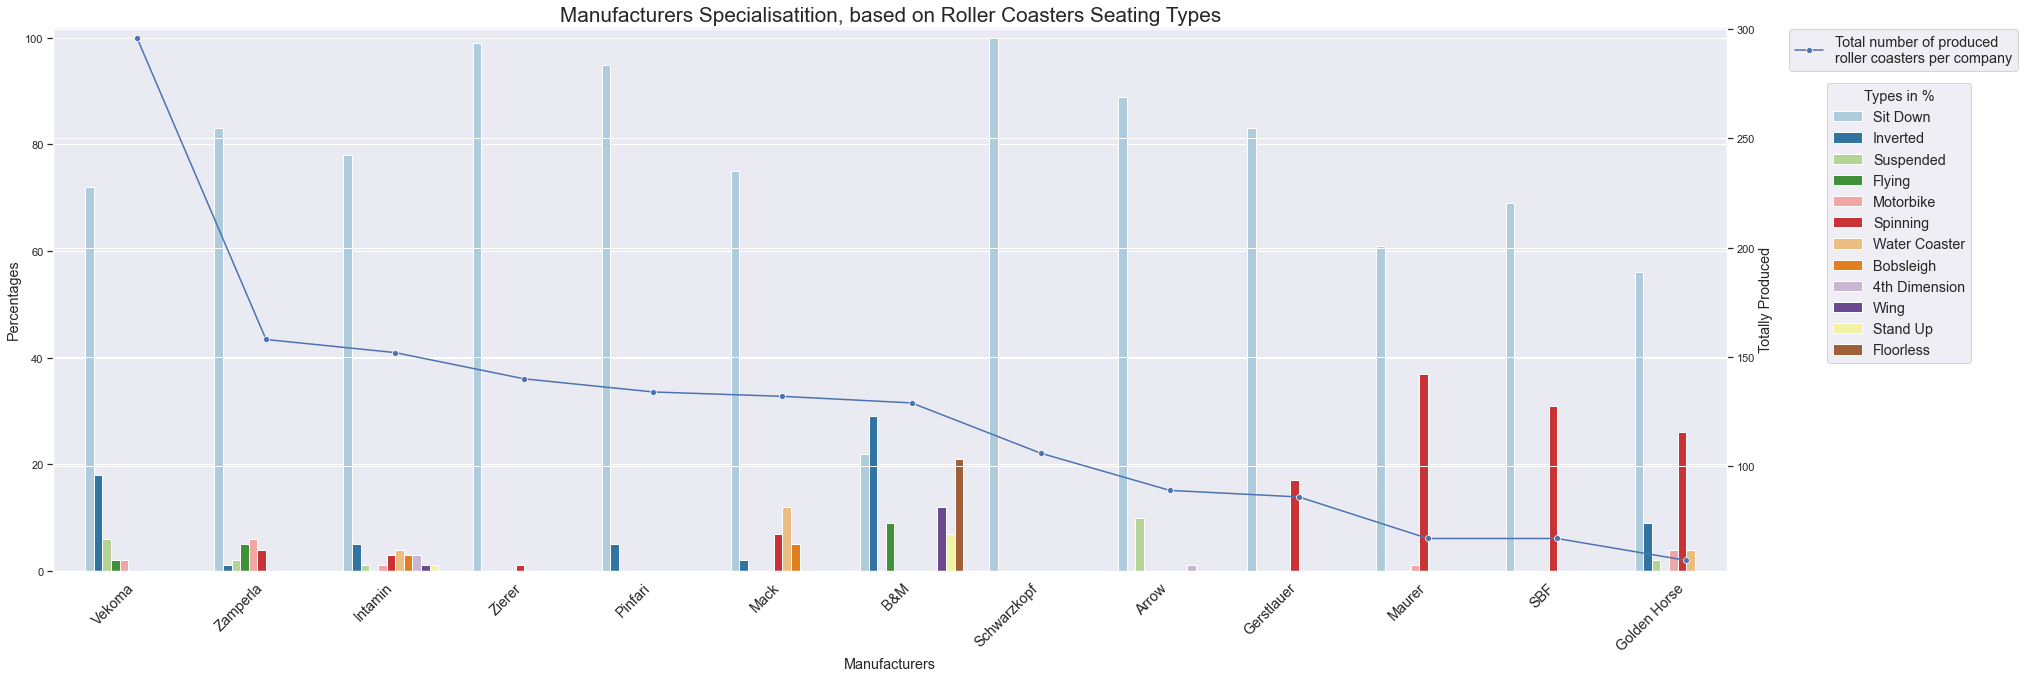

In [72]:
def group_by_seating_type(index):
    return roller_coast_list.loc[index].seating_type

manuf_specialisation_inversions, inversions_groups_bymanuf = find_specialisations(grouping_by_types=group_by_seating_type, n=50)

# Draw barplot with "inversions" DataFrame
visualise_specialisation(plot = lambda ax: sns.barplot(
    y = manuf_specialisation_inversions.percentage,
    x = manuf_specialisation_inversions.manufacturer, 
    hue=manuf_specialisation_inversions.type, 
    palette= 'Paired',
    ax=ax,
),  
    # DataFrame for lineplot as argument
    groups_bymanuf= inversions_groups_bymanuf, 
    # Measurment name for title  
    measurment = 'Seating Types')

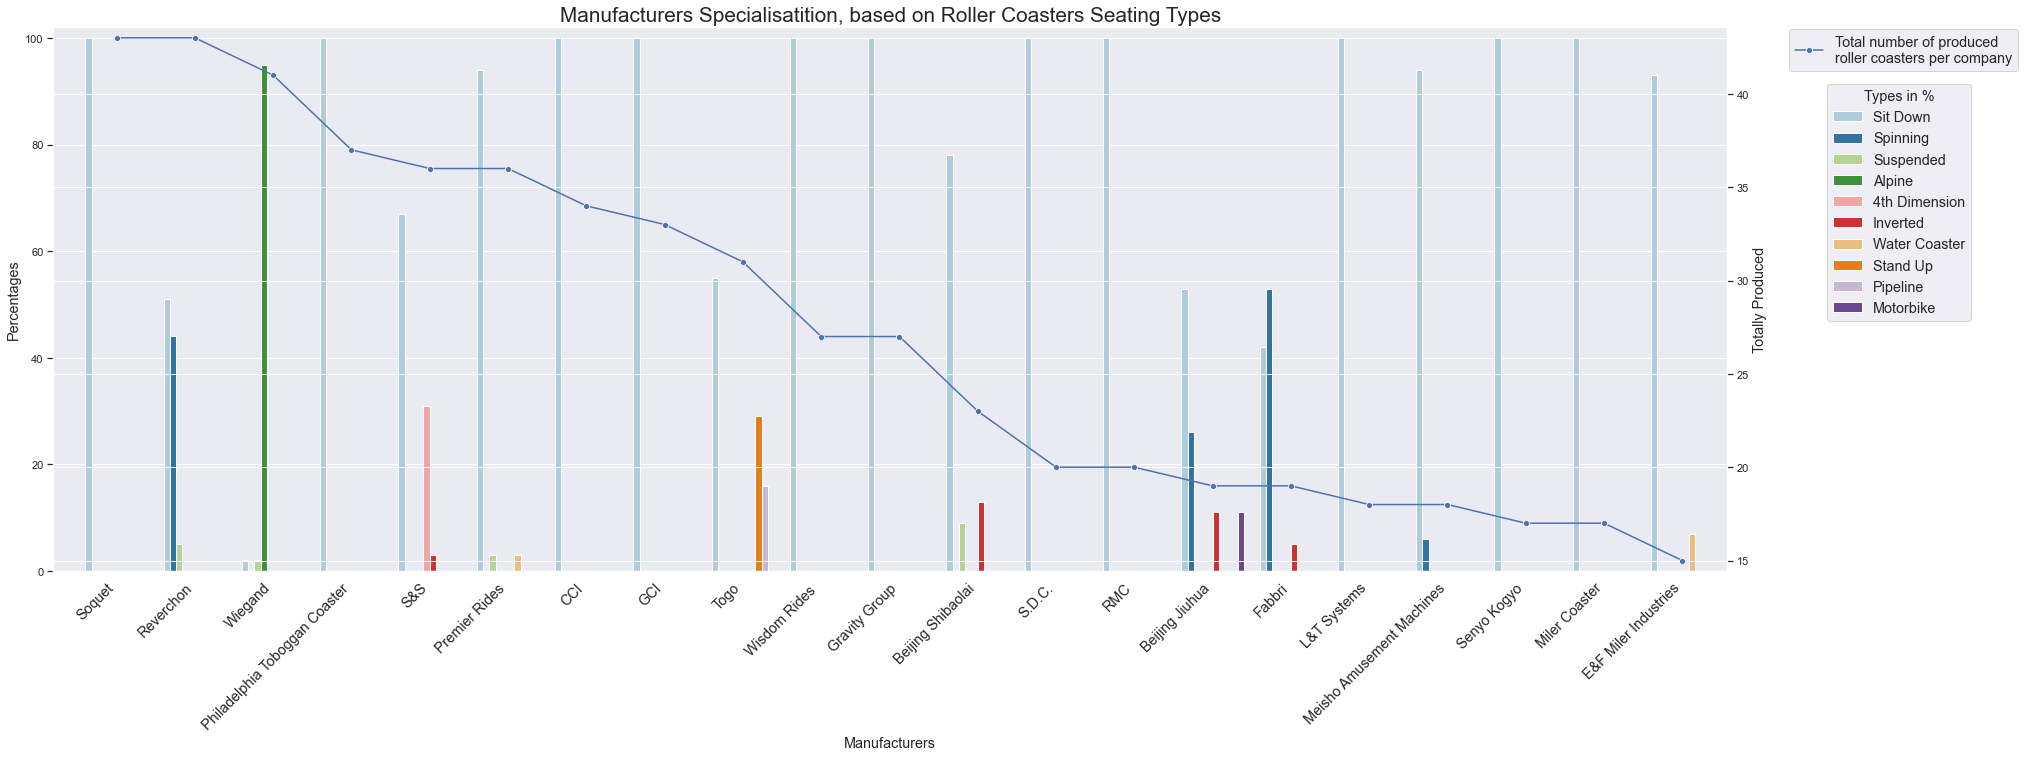

In [73]:
def group_by_seating_type(index):
    return roller_coast_list.loc[index].seating_type

manuf_specialisation_inversions, inversions_groups_bymanuf = find_specialisations(grouping_by_types=group_by_seating_type, n=15)
manuf_specialisation_inversions = manuf_specialisation_inversions[manuf_specialisation_inversions.total <= 50]
inversions_groups_bymanuf = inversions_groups_bymanuf[inversions_groups_bymanuf.total <= 50]

# Draw barplot with "inversions" DataFrame
visualise_specialisation(plot = lambda ax: sns.barplot(
    y = manuf_specialisation_inversions.percentage,
    x = manuf_specialisation_inversions.manufacturer, 
    hue=manuf_specialisation_inversions.type, 
    palette= 'Paired',
    ax=ax,
),  
    # DataFrame for lineplot as argument
    groups_bymanuf= inversions_groups_bymanuf, 
    # Measurment name for title  
    measurment = 'Seating Types')

#### Summary: 
- Every manufacturer on both plots produce at least some amount of coasters with the seating type **"Sit Down"**.

- Manufacturers that produce more than 50 roller coasters:
    - Some big manufacturers like **"Vekoma"** and **"B&M"** produce **"Inverted"** tipe of seats besides **"Sit Down"**. 
    
    - **"B&M"** is focused mainly on **"Inverted"** type of seats. Among them it produces some rare types like **"Flying"**, **"Wing"**, **"Stand up"** and **"Floorless"** in much bigger proportions and general numbers than other manufacturers. 
    
    - **"Vekoma"**, **"Arrow"** and **"Zamperla"** produce quite rare **"Suspended"** type of seats in significant numbers.
    
    - 8 companies among 13 from the first plot produce **"Spinning"** type of seats. **"Gerstlauer"**, **"Mauer"**, **"SBF"** and **"Golden House"** have this type of seats as the second by propotion (15-35%) after the main **"Sit Down"** type.

    - **"Intamin"** and **"Mack"** produce seats for **"Water Coaster"** and **"Bobsleigh"** but in small propostions ( 10%  and often less) compared to main specialties. 


- Manufacturers that produce less than 50 but more than 10:
    - **"Wiegand"** company is the only one that is clearly specialised on rare **"Alpine"** seats.
    
    - **"Roverchorn"**, **"Beijing Jiuhua"**, **"Fabbri"**, **"Meisho Amusement Machines"** have **"Spinning"** as the second type by the number of produced coasters after the main **"Sit Down"**.
    
    - **"S&S"** produces many rare **"4th Dimention"** type of seats - 35% of the line is taken by it.

    - **"Togo"** produces quite many coasters with the seat type **"Stand up"** (25 %) and a rare type named **"Pipeline"** - it takes about 20% of their production line. 

    - **"Beijing Jiuhua"** has quite significant part of the line (about 15%) taken by **"Motobike"** seats. 

### Conclusion

Within this project we have gone through some main stages of Data Analysis process:
- data wrangling,
- analysis,
- and visualisation. 

On each stage we were discovering some new insights and became able to derive some new conclusions from the given datasets. Current stage of investigation is, by all means not complete, but can give us starting points towords further reasearch.
